# Bitcoin Market Sentiment & Trader Performance Analysis

## Objective
Explore the relationship between trader performance on Hyperliquid and Bitcoin market sentiment (Fear/Greed Index), uncover hidden patterns, and deliver insights that can drive smarter trading strategies.

### Datasets:
1. **Bitcoin Market Sentiment Dataset** - Fear and Greed Index with daily classifications
2. **Historical Trader Data from Hyperliquid** - Detailed trade execution data including PnL, leverage, and position information

## 1. Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical testing
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency, pearsonr, spearmanr

# Date handling
from datetime import datetime, timedelta

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Load and Inspect Datasets

In [2]:
# Load the Fear and Greed Index dataset
sentiment_df = pd.read_csv('fear_greed_index.csv')

# Load the Hyperliquid historical trading data
trader_df = pd.read_csv('historical_data.csv')

print("=" * 60)
print("FEAR & GREED INDEX DATASET")
print("=" * 60)
print(f"Shape: {sentiment_df.shape}")
print(f"\nColumns: {sentiment_df.columns.tolist()}")
print(f"\nData Types:\n{sentiment_df.dtypes}")
print(f"\nFirst 5 rows:")
sentiment_df.head()

FEAR & GREED INDEX DATASET
Shape: (2644, 4)

Columns: ['timestamp', 'value', 'classification', 'date']

Data Types:
timestamp          int64
value              int64
classification    object
date              object
dtype: object

First 5 rows:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [3]:
print("=" * 60)
print("HYPERLIQUID TRADER DATA")
print("=" * 60)
print(f"Shape: {trader_df.shape}")
print(f"\nColumns: {trader_df.columns.tolist()}")
print(f"\nData Types:\n{trader_df.dtypes}")
print(f"\nFirst 5 rows:")
trader_df.head()

HYPERLIQUID TRADER DATA
Shape: (211224, 16)

Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

Data Types:
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object

First 5 rows:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.8700,7872.1600,BUY,02-12-2024 22:50,0.0000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.3454,895000000000000.0000,1730000000000.0000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.0000,127.6800,BUY,02-12-2024 22:50,986.5246,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0056,443000000000000.0000,1730000000000.0000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.0900,1150.6300,BUY,02-12-2024 22:50,1002.5190,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0504,660000000000000.0000,1730000000000.0000
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.9800,1142.0400,BUY,02-12-2024 22:50,1146.5586,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0500,1080000000000000.0000,1730000000000.0000
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.7300,69.7500,BUY,02-12-2024 22:50,1289.4885,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0031,1050000000000000.0000,1730000000000.0000


In [4]:
# Basic statistics for both datasets
print("=" * 60)
print("SENTIMENT DATA STATISTICS")
print("=" * 60)
print(sentiment_df.describe())

print("\n" + "=" * 60)
print("TRADER DATA STATISTICS")
print("=" * 60)
print(trader_df.describe())

SENTIMENT DATA STATISTICS
            timestamp     value
count       2644.0000 2644.0000
mean  1631898885.0227   46.9811
std     65979674.3222   21.8277
min   1517463000.0000    5.0000
25%   1574811000.0000   28.0000
50%   1631899800.0000   46.0000
75%   1688988600.0000   66.0000
max   1746163800.0000   95.0000

TRADER DATA STATISTICS
       Execution Price   Size Tokens     Size USD  Start Position  \
count      211224.0000   211224.0000  211224.0000     211224.0000   
mean        11414.7233     4623.3650    5639.4512     -29946.2488   
std         29447.6549   104272.8895   36575.1385     673807.4237   
min             0.0000        0.0000       0.0000  -14334629.0000   
25%             4.8547        2.9400     193.7900       -376.2311   
50%            18.2800       32.0000     597.0450         84.7279   
75%           101.5800      187.9025    2058.9600       9337.2775   
max        109004.0000 15822438.0000 3921430.7200   30509482.0000   

        Closed PnL         Order ID     

## 3. Data Cleaning and Preprocessing

In [5]:
# Check for missing values
print("Missing Values in Sentiment Data:")
print(sentiment_df.isnull().sum())
print("\nMissing Values in Trader Data:")
print(trader_df.isnull().sum())

Missing Values in Sentiment Data:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing Values in Trader Data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [6]:
# Clean and standardize Sentiment Data
sentiment_df_clean = sentiment_df.copy()

# Convert date column to datetime
sentiment_df_clean['date'] = pd.to_datetime(sentiment_df_clean['date'])

# Rename columns for consistency
sentiment_df_clean.columns = ['timestamp', 'sentiment_value', 'sentiment_class', 'date']

# Create a simplified sentiment category (Fear vs Greed vs Neutral)
def simplify_sentiment(classification):
    if 'Fear' in classification:
        return 'Fear'
    elif 'Greed' in classification:
        return 'Greed'
    else:
        return 'Neutral'

sentiment_df_clean['sentiment_category'] = sentiment_df_clean['sentiment_class'].apply(simplify_sentiment)

print("Cleaned Sentiment Data:")
print(sentiment_df_clean.head())
print(f"\nSentiment Categories Distribution:")
print(sentiment_df_clean['sentiment_category'].value_counts())

Cleaned Sentiment Data:
    timestamp  sentiment_value sentiment_class       date sentiment_category
0  1517463000               30            Fear 2018-02-01               Fear
1  1517549400               15    Extreme Fear 2018-02-02               Fear
2  1517635800               40            Fear 2018-02-03               Fear
3  1517722200               24    Extreme Fear 2018-02-04               Fear
4  1517808600               11    Extreme Fear 2018-02-05               Fear

Sentiment Categories Distribution:
sentiment_category
Fear       1289
Greed       959
Neutral     396
Name: count, dtype: int64


In [7]:
# Clean and standardize Trader Data
trader_df_clean = trader_df.copy()

# Standardize column names
trader_df_clean.columns = [col.lower().replace(' ', '_') for col in trader_df_clean.columns]

# Convert timestamp to datetime - handle the DD-MM-YYYY HH:MM format
trader_df_clean['timestamp_ist'] = pd.to_datetime(trader_df_clean['timestamp_ist'], format='%d-%m-%Y %H:%M')

# Extract date for merging
trader_df_clean['date'] = trader_df_clean['timestamp_ist'].dt.date
trader_df_clean['date'] = pd.to_datetime(trader_df_clean['date'])

# Convert numeric columns
numeric_cols = ['execution_price', 'size_tokens', 'size_usd', 'start_position', 'closed_pnl', 'fee']
for col in numeric_cols:
    if col in trader_df_clean.columns:
        trader_df_clean[col] = pd.to_numeric(trader_df_clean[col], errors='coerce')

print("Cleaned Trader Data Columns:")
print(trader_df_clean.columns.tolist())
print(f"\nDate Range: {trader_df_clean['date'].min()} to {trader_df_clean['date'].max()}")
print(f"\nUnique Traders: {trader_df_clean['account'].nunique()}")
print(f"Unique Coins: {trader_df_clean['coin'].nunique()}")
trader_df_clean.head()

Cleaned Trader Data Columns:
['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'date']

Date Range: 2023-05-01 00:00:00 to 2025-05-01 00:00:00

Unique Traders: 32
Unique Coins: 246


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.8700,7872.1600,BUY,2024-12-02 22:50:00,0.0000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.3454,895000000000000.0000,1730000000000.0000,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.0000,127.6800,BUY,2024-12-02 22:50:00,986.5246,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0056,443000000000000.0000,1730000000000.0000,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.0900,1150.6300,BUY,2024-12-02 22:50:00,1002.5190,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0504,660000000000000.0000,1730000000000.0000,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.9800,1142.0400,BUY,2024-12-02 22:50:00,1146.5586,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0500,1080000000000000.0000,1730000000000.0000,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.7300,69.7500,BUY,2024-12-02 22:50:00,1289.4885,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0031,1050000000000000.0000,1730000000000.0000,2024-12-02


## 4. Feature Engineering for Trader Data

In [8]:
# Create derived features
trader_df_clean['trade_value'] = trader_df_clean['execution_price'] * trader_df_clean['size_tokens']
trader_df_clean['is_profitable'] = (trader_df_clean['closed_pnl'] > 0).astype(int)
trader_df_clean['is_loss'] = (trader_df_clean['closed_pnl'] < 0).astype(int)
trader_df_clean['is_buy'] = (trader_df_clean['side'] == 'BUY').astype(int)
trader_df_clean['is_sell'] = (trader_df_clean['side'] == 'SELL').astype(int)

# Extract time features
trader_df_clean['hour'] = trader_df_clean['timestamp_ist'].dt.hour
trader_df_clean['day_of_week'] = trader_df_clean['timestamp_ist'].dt.dayofweek
trader_df_clean['is_weekend'] = trader_df_clean['day_of_week'].isin([5, 6]).astype(int)

print("New Features Created:")
print(trader_df_clean[['trade_value', 'is_profitable', 'is_buy', 'hour', 'day_of_week']].head(10))

New Features Created:
   trade_value  is_profitable  is_buy  hour  day_of_week
0    7872.1633              0       1    22            0
1     127.6800              0       1    22            0
2    1150.6307              0       1    22            0
3    1142.0385              0       1    22            0
4      69.7475              0       1    22            0
5      11.2659              0       1    22            0
6    1151.7690              0       1    22            0
7     272.0000              0       1    22            0
8     368.0000              0       1    22            0
9     100.0000              0       1    22            0


In [9]:
# Create daily aggregated metrics per trader
daily_trader_metrics = trader_df_clean.groupby(['account', 'date']).agg({
    'closed_pnl': ['sum', 'mean', 'count'],
    'size_usd': ['sum', 'mean'],
    'fee': 'sum',
    'is_profitable': 'sum',
    'is_loss': 'sum',
    'is_buy': 'sum',
    'is_sell': 'sum',
    'trade_value': 'sum'
}).reset_index()

# Flatten column names
daily_trader_metrics.columns = ['account', 'date', 'total_pnl', 'avg_pnl', 'trade_count', 
                                 'total_volume_usd', 'avg_trade_size', 'total_fees',
                                 'profitable_trades', 'loss_trades', 'buy_count', 'sell_count', 'total_trade_value']

# Calculate win rate
daily_trader_metrics['win_rate'] = daily_trader_metrics['profitable_trades'] / daily_trader_metrics['trade_count']
daily_trader_metrics['net_pnl'] = daily_trader_metrics['total_pnl'] - daily_trader_metrics['total_fees']

print("Daily Trader Metrics Summary:")
daily_trader_metrics.head(10)

Daily Trader Metrics Summary:


,account,date,total_pnl,avg_pnl,trade_count,total_volume_usd,avg_trade_size,total_fees,profitable_trades,loss_trades,buy_count,sell_count,total_trade_value,win_rate,net_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0000,0.0000,177,900880.1300,5089.7182,167.7961,0,0,0,177,900880.0625,0.0000,-167.7961
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0000,0.0000,68,542413.1800,7976.6644,67.8836,0,0,0,68,542413.1994,0.0000,-67.8836
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0000,0.0000,40,949380.0000,23734.5000,94.9380,0,0,0,40,949380.0000,0.0000,-94.9380
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0000,-1768.9167,12,338240.0000,28186.6667,33.8240,0,12,12,0,338240.0000,0.0000,-21260.8240
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1000,59.3741,27,465700.0000,17248.1481,104.6225,12,0,12,15,465700.0000,0.4444,1498.4775
5,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-28,-132271.0000,-1613.0610,82,1316799.9800,16058.5363,131.6800,0,82,82,0,1316800.0000,0.0000,-132402.6800
6,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-30,0.0000,0.0000,23,1116918.7700,48561.6857,390.9216,0,0,0,23,1116918.7589,0.0000,-390.9216
7,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-12-06,-175611.0001,-5321.5455,33,1212299.9600,36736.3624,121.2300,0,33,33,0,1212300.0000,0.0000,-175732.2300
8,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-19,71393.9641,153.5354,465,5306093.6200,11410.9540,780.3364,23,89,112,353,5306093.5363,0.0495,70613.6277
9,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-20,40218.6000,788.6000,51,479429.9900,9400.5880,23.9715,28,0,28,23,479430.0000,0.5490,40194.6285


## 5. Merge Datasets on Date

In [10]:
# Merge trade-level data with sentiment
merged_trades = trader_df_clean.merge(
    sentiment_df_clean[['date', 'sentiment_value', 'sentiment_class', 'sentiment_category']],
    on='date',
    how='left'
)

# Merge daily aggregated data with sentiment
merged_daily = daily_trader_metrics.merge(
    sentiment_df_clean[['date', 'sentiment_value', 'sentiment_class', 'sentiment_category']],
    on='date',
    how='left'
)

print(f"Trade-level merged data shape: {merged_trades.shape}")
print(f"Daily merged data shape: {merged_daily.shape}")
print(f"\nMissing sentiment values (trades without matching sentiment date):")
print(merged_trades['sentiment_category'].isnull().sum())

# Drop rows without sentiment data
merged_trades = merged_trades.dropna(subset=['sentiment_category'])
merged_daily = merged_daily.dropna(subset=['sentiment_category'])

print(f"\nAfter removing missing sentiment:")
print(f"Trade-level data: {merged_trades.shape}")
print(f"Daily data: {merged_daily.shape}")

Trade-level merged data shape: (211224, 28)
Daily merged data shape: (2341, 18)

Missing sentiment values (trades without matching sentiment date):
6

After removing missing sentiment:
Trade-level data: (211218, 28)
Daily data: (2340, 18)


In [11]:
# Preview merged data
print("Sample of Merged Trade Data:")
merged_trades[['account', 'date', 'side', 'size_usd', 'closed_pnl', 'sentiment_category', 'sentiment_value']].head(10)

Sample of Merged Trade Data:


,account,date,side,size_usd,closed_pnl,sentiment_category,sentiment_value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,7872.1600,0.0000,Greed,80.0000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,127.6800,0.0000,Greed,80.0000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1150.6300,0.0000,Greed,80.0000
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1142.0400,0.0000,Greed,80.0000
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,69.7500,0.0000,Greed,80.0000
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,11.2700,0.0000,Greed,80.0000
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1151.7700,0.0000,Greed,80.0000
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,272.0000,0.0000,Greed,80.0000
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,368.0000,0.0000,Greed,80.0000
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,100.0000,0.0000,Greed,80.0000


## 6. Exploratory Data Analysis - Sentiment Distribution

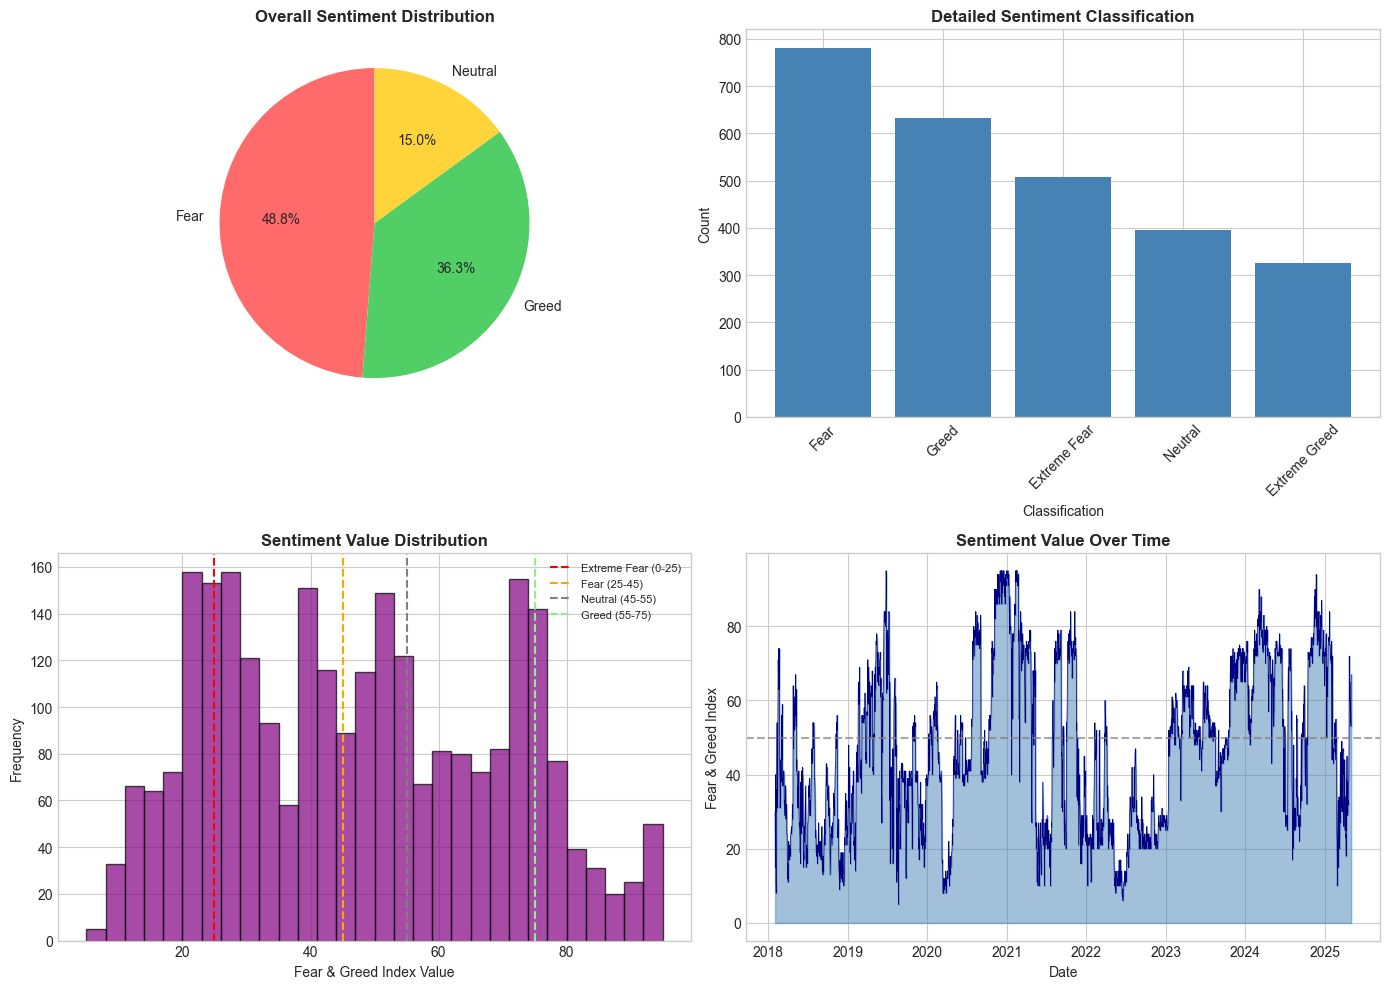


📊 Sentiment Statistics:
count   2644.0000
mean      46.9811
std       21.8277
min        5.0000
25%       28.0000
50%       46.0000
75%       66.0000
max       95.0000
Name: sentiment_value, dtype: float64


In [12]:
# Sentiment Distribution Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Pie chart of sentiment categories
colors = {'Fear': '#ff6b6b', 'Greed': '#51cf66', 'Neutral': '#ffd43b'}
sentiment_counts = sentiment_df_clean['sentiment_category'].value_counts()
axes[0, 0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
               colors=[colors[cat] for cat in sentiment_counts.index], startangle=90)
axes[0, 0].set_title('Overall Sentiment Distribution', fontsize=12, fontweight='bold')

# 2. Detailed classification distribution
class_counts = sentiment_df_clean['sentiment_class'].value_counts()
bars = axes[0, 1].bar(class_counts.index, class_counts.values, color='steelblue')
axes[0, 1].set_title('Detailed Sentiment Classification', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Classification')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Sentiment Value Distribution (Histogram)
axes[1, 0].hist(sentiment_df_clean['sentiment_value'], bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(x=25, color='red', linestyle='--', label='Extreme Fear (0-25)')
axes[1, 0].axvline(x=45, color='orange', linestyle='--', label='Fear (25-45)')
axes[1, 0].axvline(x=55, color='gray', linestyle='--', label='Neutral (45-55)')
axes[1, 0].axvline(x=75, color='lightgreen', linestyle='--', label='Greed (55-75)')
axes[1, 0].set_title('Sentiment Value Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Fear & Greed Index Value')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend(fontsize=8)

# 4. Sentiment over time
sentiment_df_clean_sorted = sentiment_df_clean.sort_values('date')
axes[1, 1].fill_between(sentiment_df_clean_sorted['date'], sentiment_df_clean_sorted['sentiment_value'], 
                        alpha=0.5, color='steelblue')
axes[1, 1].plot(sentiment_df_clean_sorted['date'], sentiment_df_clean_sorted['sentiment_value'], 
                color='navy', linewidth=0.5)
axes[1, 1].axhline(y=50, color='gray', linestyle='--', alpha=0.7)
axes[1, 1].set_title('Sentiment Value Over Time', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Fear & Greed Index')

plt.tight_layout()
plt.savefig('sentiment_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Sentiment Statistics:")
print(sentiment_df_clean['sentiment_value'].describe())

## 7. Exploratory Data Analysis - Trader Performance Metrics

In [13]:
# Calculate overall trader performance metrics
trader_performance = merged_trades.groupby('account').agg({
    'closed_pnl': ['sum', 'mean', 'std', 'count'],
    'size_usd': ['sum', 'mean'],
    'fee': 'sum',
    'is_profitable': 'sum',
    'is_loss': 'sum'
}).reset_index()

trader_performance.columns = ['account', 'total_pnl', 'avg_pnl', 'pnl_std', 'total_trades',
                               'total_volume', 'avg_trade_size', 'total_fees', 
                               'profitable_trades', 'loss_trades']

trader_performance['win_rate'] = trader_performance['profitable_trades'] / trader_performance['total_trades']
trader_performance['profit_factor'] = trader_performance['total_pnl'] / (trader_performance['total_fees'] + 1)

print("=" * 60)
print("TOP 10 TRADERS BY TOTAL PnL")
print("=" * 60)
print(trader_performance.nlargest(10, 'total_pnl')[['account', 'total_pnl', 'total_trades', 'win_rate', 'avg_trade_size']])

print("\n" + "=" * 60)
print("TRADER PERFORMANCE STATISTICS")
print("=" * 60)
print(trader_performance[['total_pnl', 'avg_pnl', 'total_trades', 'win_rate']].describe())

TOP 10 TRADERS BY TOTAL PnL
                                       account    total_pnl  total_trades  \
27  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23 2143382.5977         14733   
0   0x083384f897ee0f19899168e3b1bec365f52a9012 1600229.8200          3818   
29  0xbaaaf6571ab7d571043ff1e313a9609a10637864  940163.8062         21192   
13  0x513b8629fe877bb581bf244e326a047b249c4ff1  840422.5552         12236   
31  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  836080.5531         40184   
11  0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  677747.0506          4356   
15  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  429355.5659          1590   
9   0x430f09841d65beb3f27765503d0f850b8bce7713  416541.8723          1237   
17  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  379095.4067          9893   
16  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  360539.5100          1424   

    win_rate  avg_trade_size  
27    0.3371       3837.8854  
0     0.3596      16159.5767  
29    0.4676       3210.4728  


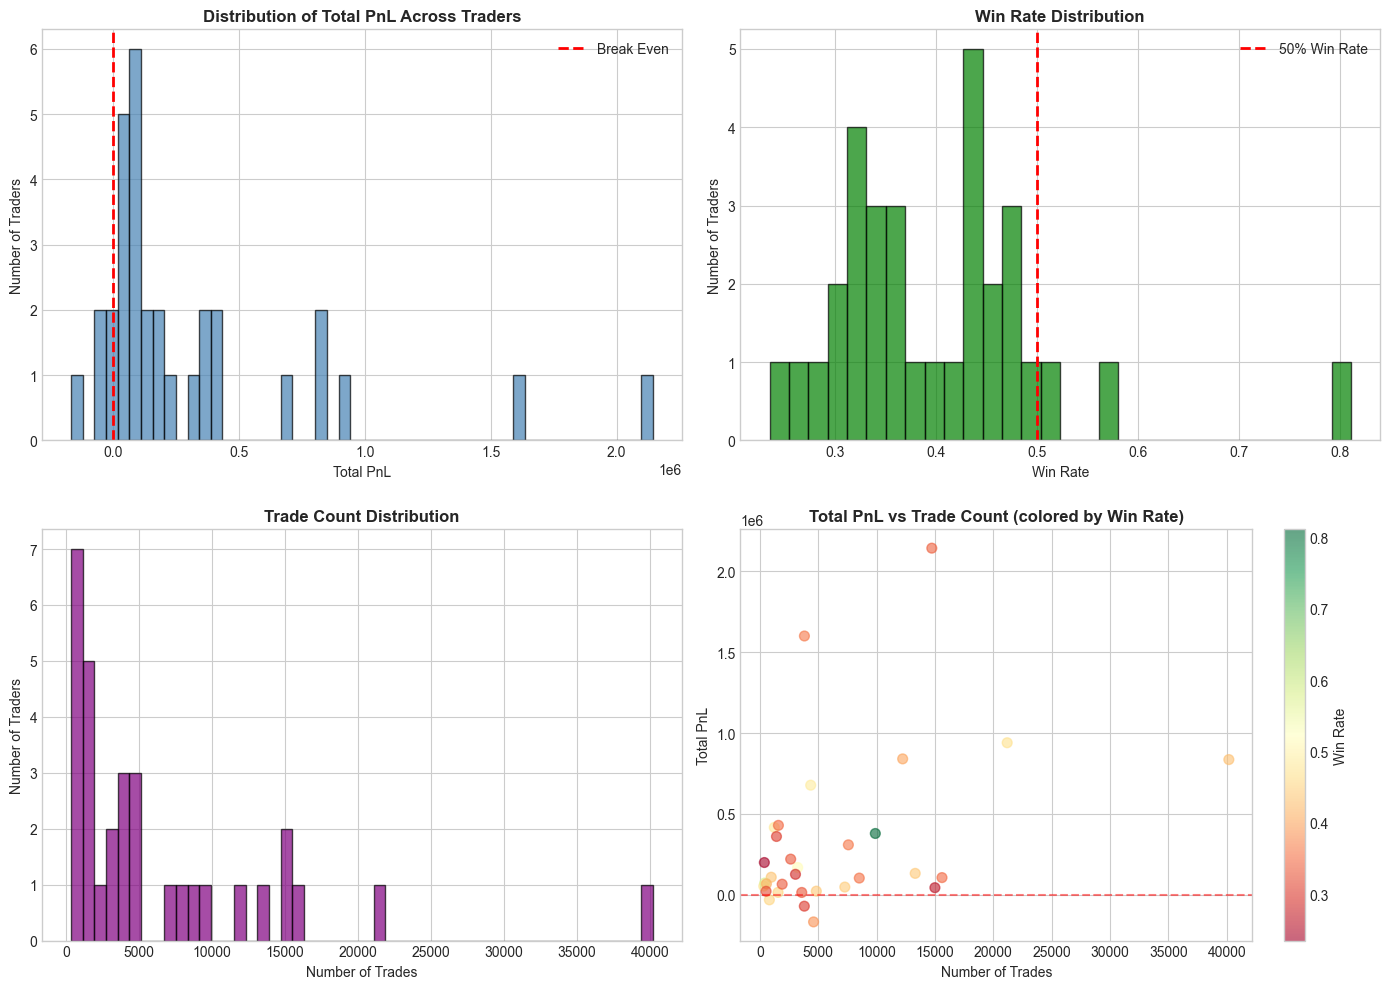

In [14]:
# Trader Performance Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution of Total PnL
axes[0, 0].hist(trader_performance['total_pnl'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Break Even')
axes[0, 0].set_title('Distribution of Total PnL Across Traders', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Total PnL')
axes[0, 0].set_ylabel('Number of Traders')
axes[0, 0].legend()

# 2. Win Rate Distribution
axes[0, 1].hist(trader_performance['win_rate'], bins=30, color='green', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='50% Win Rate')
axes[0, 1].set_title('Win Rate Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Win Rate')
axes[0, 1].set_ylabel('Number of Traders')
axes[0, 1].legend()

# 3. Trade Count Distribution
axes[1, 0].hist(trader_performance['total_trades'], bins=50, color='purple', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Trade Count Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Number of Trades')
axes[1, 0].set_ylabel('Number of Traders')

# 4. PnL vs Trade Count Scatter
scatter = axes[1, 1].scatter(trader_performance['total_trades'], trader_performance['total_pnl'],
                             c=trader_performance['win_rate'], cmap='RdYlGn', alpha=0.6, s=50)
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1, 1].set_title('Total PnL vs Trade Count (colored by Win Rate)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Number of Trades')
axes[1, 1].set_ylabel('Total PnL')
plt.colorbar(scatter, ax=axes[1, 1], label='Win Rate')

plt.tight_layout()
plt.savefig('trader_performance.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Analyze PnL by Market Sentiment

This is a critical analysis to understand how trader profitability changes based on market sentiment (Fear vs Greed).

In [15]:
# PnL Analysis by Sentiment Category
pnl_by_sentiment = merged_trades.groupby('sentiment_category').agg({
    'closed_pnl': ['sum', 'mean', 'median', 'std', 'count'],
    'size_usd': ['sum', 'mean'],
    'is_profitable': 'sum',
    'is_loss': 'sum'
}).reset_index()

pnl_by_sentiment.columns = ['sentiment_category', 'total_pnl', 'mean_pnl', 'median_pnl', 'std_pnl', 
                             'trade_count', 'total_volume', 'avg_trade_size', 'profitable_trades', 'loss_trades']
pnl_by_sentiment['win_rate'] = pnl_by_sentiment['profitable_trades'] / pnl_by_sentiment['trade_count']

print("=" * 80)
print("PnL ANALYSIS BY MARKET SENTIMENT")
print("=" * 80)
print(pnl_by_sentiment.to_string(index=False))

print("\n" + "=" * 80)
print("KEY INSIGHTS:")
print("=" * 80)
for idx, row in pnl_by_sentiment.iterrows():
    print(f"\n{row['sentiment_category'].upper()} Market:")
    print(f"  - Total PnL: ${row['total_pnl']:,.2f}")
    print(f"  - Average PnL per Trade: ${row['mean_pnl']:,.4f}")
    print(f"  - Win Rate: {row['win_rate']*100:.2f}%")
    print(f"  - Total Trades: {row['trade_count']:,}")

PnL ANALYSIS BY MARKET SENTIMENT
sentiment_category    total_pnl  mean_pnl  median_pnl  std_pnl  trade_count   total_volume  avg_trade_size  profitable_trades  loss_trades  win_rate
              Fear 4096265.6901   49.2121      0.0000 990.8754        83237 597809051.2300       7182.0110              33950         6264    0.4079
             Greed 4865300.5836   53.8823      0.0000 976.9643        90295 413047659.2900       4574.4245              37952         8077    0.4203
           Neutral 1292920.6756   34.3077      0.0000 517.1222        37686 180242063.0800       4782.7327              14961         3198    0.3970

KEY INSIGHTS:

FEAR Market:
  - Total PnL: $4,096,265.69
  - Average PnL per Trade: $49.2121
  - Win Rate: 40.79%
  - Total Trades: 83,237

GREED Market:
  - Total PnL: $4,865,300.58
  - Average PnL per Trade: $53.8823
  - Win Rate: 42.03%
  - Total Trades: 90,295

NEUTRAL Market:
  - Total PnL: $1,292,920.68
  - Average PnL per Trade: $34.3077
  - Win Rate: 39.70%
  

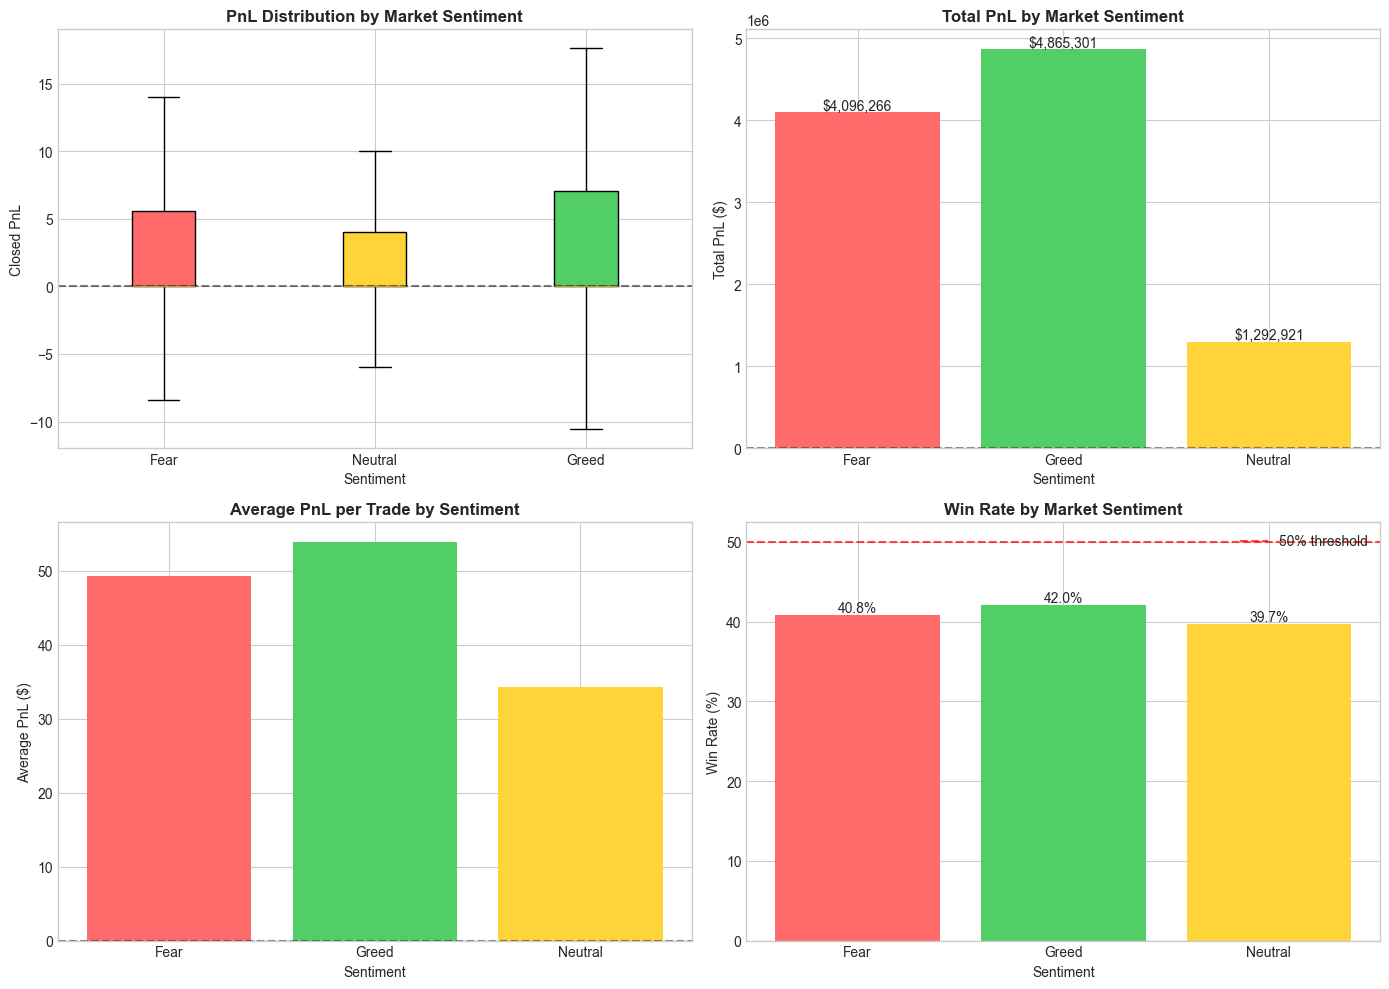

In [16]:
# Visualize PnL by Sentiment
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = {'Fear': '#ff6b6b', 'Greed': '#51cf66', 'Neutral': '#ffd43b'}

# 1. Box plot of PnL by Sentiment
sentiment_order = ['Fear', 'Neutral', 'Greed']
box_data = [merged_trades[merged_trades['sentiment_category'] == cat]['closed_pnl'].values 
            for cat in sentiment_order]
bp = axes[0, 0].boxplot(box_data, labels=sentiment_order, patch_artist=True, showfliers=False)
for patch, cat in zip(bp['boxes'], sentiment_order):
    patch.set_facecolor(colors[cat])
axes[0, 0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0, 0].set_title('PnL Distribution by Market Sentiment', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Sentiment')
axes[0, 0].set_ylabel('Closed PnL')

# 2. Total PnL Bar Chart
bars = axes[0, 1].bar(pnl_by_sentiment['sentiment_category'], pnl_by_sentiment['total_pnl'],
                      color=[colors[cat] for cat in pnl_by_sentiment['sentiment_category']])
axes[0, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Total PnL by Market Sentiment', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Sentiment')
axes[0, 1].set_ylabel('Total PnL ($)')
for bar, val in zip(bars, pnl_by_sentiment['total_pnl']):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'${val:,.0f}', 
                    ha='center', va='bottom', fontsize=10)

# 3. Average PnL Bar Chart
bars = axes[1, 0].bar(pnl_by_sentiment['sentiment_category'], pnl_by_sentiment['mean_pnl'],
                      color=[colors[cat] for cat in pnl_by_sentiment['sentiment_category']])
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 0].set_title('Average PnL per Trade by Sentiment', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Sentiment')
axes[1, 0].set_ylabel('Average PnL ($)')

# 4. Win Rate by Sentiment
bars = axes[1, 1].bar(pnl_by_sentiment['sentiment_category'], pnl_by_sentiment['win_rate'] * 100,
                      color=[colors[cat] for cat in pnl_by_sentiment['sentiment_category']])
axes[1, 1].axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% threshold')
axes[1, 1].set_title('Win Rate by Market Sentiment', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Sentiment')
axes[1, 1].set_ylabel('Win Rate (%)')
axes[1, 1].legend()
for bar, val in zip(bars, pnl_by_sentiment['win_rate'] * 100):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{val:.1f}%', 
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('pnl_by_sentiment.png', dpi=150, bbox_inches='tight')
plt.show()

## 9. Analyze Trading Behavior by Sentiment

In [17]:
# Trading Behavior Analysis by Sentiment
behavior_by_sentiment = merged_trades.groupby('sentiment_category').agg({
    'size_usd': ['sum', 'mean', 'median'],
    'trade_value': ['sum', 'mean'],
    'is_buy': 'sum',
    'is_sell': 'sum',
    'account': 'nunique',
    'coin': 'nunique'
}).reset_index()

behavior_by_sentiment.columns = ['sentiment_category', 'total_volume_usd', 'avg_trade_size', 'median_trade_size',
                                  'total_trade_value', 'avg_trade_value', 'buy_count', 'sell_count',
                                  'unique_traders', 'unique_coins']

behavior_by_sentiment['buy_sell_ratio'] = behavior_by_sentiment['buy_count'] / behavior_by_sentiment['sell_count']
behavior_by_sentiment['total_trades'] = behavior_by_sentiment['buy_count'] + behavior_by_sentiment['sell_count']
behavior_by_sentiment['trades_per_trader'] = behavior_by_sentiment['total_trades'] / behavior_by_sentiment['unique_traders']

print("=" * 80)
print("TRADING BEHAVIOR BY MARKET SENTIMENT")
print("=" * 80)
print(behavior_by_sentiment[['sentiment_category', 'total_volume_usd', 'avg_trade_size', 
                              'buy_sell_ratio', 'trades_per_trader', 'unique_traders']].to_string(index=False))

TRADING BEHAVIOR BY MARKET SENTIMENT
sentiment_category  total_volume_usd  avg_trade_size  buy_sell_ratio  trades_per_trader  unique_traders
              Fear    597809051.2300       7182.0110          0.9803          2601.1562              32
             Greed    413047659.2900       4574.4245          0.8898          2912.7419              31
           Neutral    180242063.0800       4782.7327          1.0135          1215.6774              31


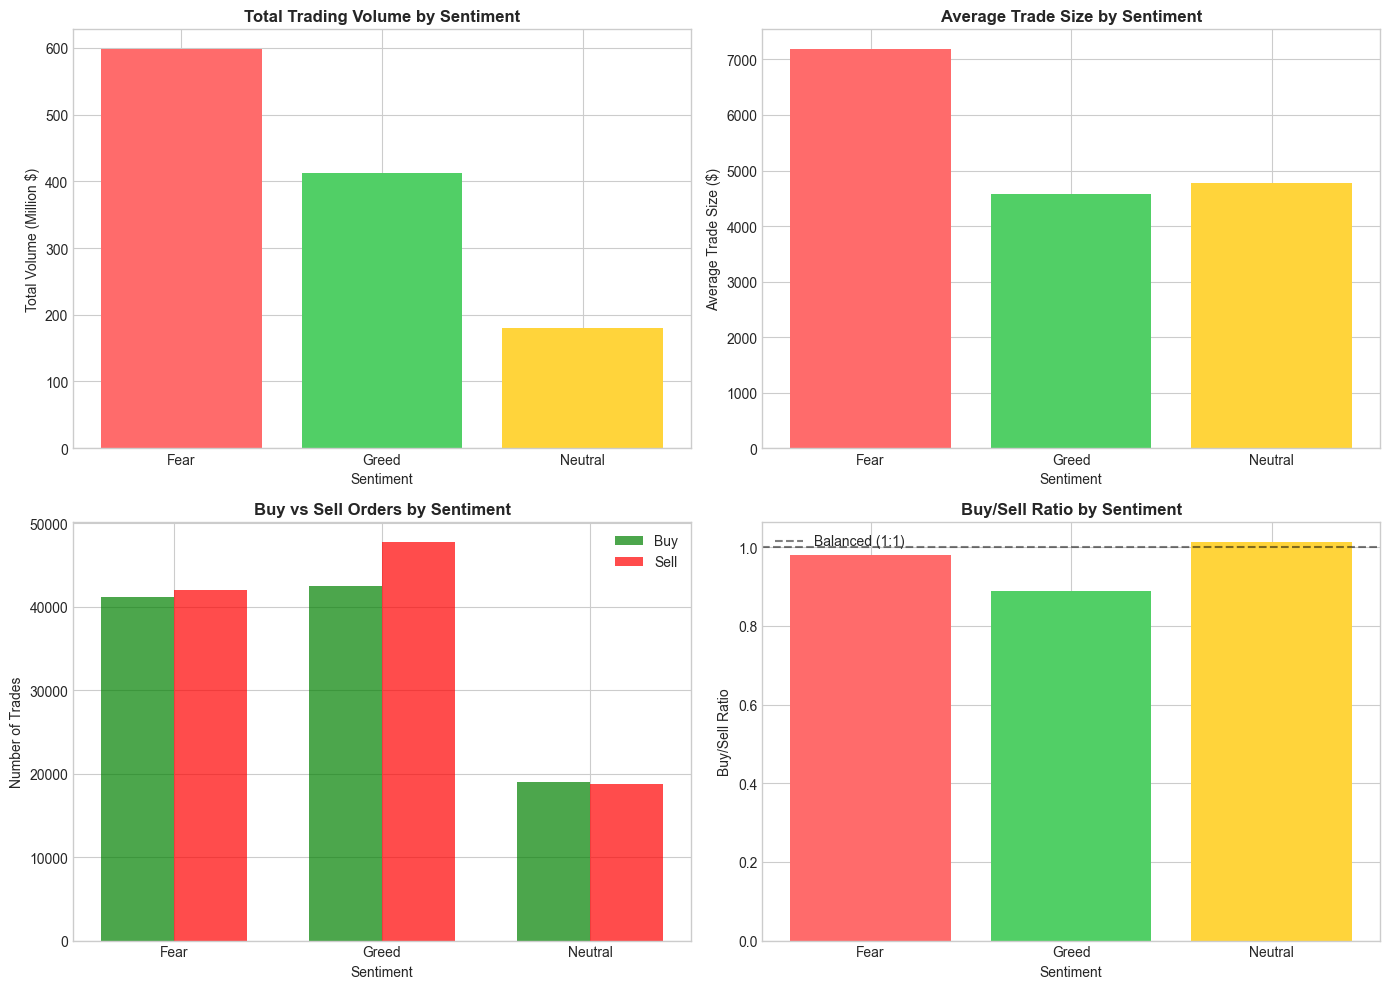

In [18]:
# Visualize Trading Behavior
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = {'Fear': '#ff6b6b', 'Greed': '#51cf66', 'Neutral': '#ffd43b'}

# 1. Trading Volume by Sentiment
bars = axes[0, 0].bar(behavior_by_sentiment['sentiment_category'], 
                      behavior_by_sentiment['total_volume_usd'] / 1e6,
                      color=[colors[cat] for cat in behavior_by_sentiment['sentiment_category']])
axes[0, 0].set_title('Total Trading Volume by Sentiment', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Sentiment')
axes[0, 0].set_ylabel('Total Volume (Million $)')

# 2. Average Trade Size by Sentiment
bars = axes[0, 1].bar(behavior_by_sentiment['sentiment_category'], 
                      behavior_by_sentiment['avg_trade_size'],
                      color=[colors[cat] for cat in behavior_by_sentiment['sentiment_category']])
axes[0, 1].set_title('Average Trade Size by Sentiment', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Sentiment')
axes[0, 1].set_ylabel('Average Trade Size ($)')

# 3. Buy vs Sell Distribution by Sentiment
x = np.arange(len(behavior_by_sentiment))
width = 0.35
axes[1, 0].bar(x - width/2, behavior_by_sentiment['buy_count'], width, label='Buy', color='green', alpha=0.7)
axes[1, 0].bar(x + width/2, behavior_by_sentiment['sell_count'], width, label='Sell', color='red', alpha=0.7)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(behavior_by_sentiment['sentiment_category'])
axes[1, 0].set_title('Buy vs Sell Orders by Sentiment', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Sentiment')
axes[1, 0].set_ylabel('Number of Trades')
axes[1, 0].legend()

# 4. Buy/Sell Ratio by Sentiment
bars = axes[1, 1].bar(behavior_by_sentiment['sentiment_category'], 
                      behavior_by_sentiment['buy_sell_ratio'],
                      color=[colors[cat] for cat in behavior_by_sentiment['sentiment_category']])
axes[1, 1].axhline(y=1, color='black', linestyle='--', alpha=0.5, label='Balanced (1:1)')
axes[1, 1].set_title('Buy/Sell Ratio by Sentiment', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Sentiment')
axes[1, 1].set_ylabel('Buy/Sell Ratio')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('trading_behavior_sentiment.png', dpi=150, bbox_inches='tight')
plt.show()

## 10. Leverage Analysis by Sentiment

*(Note: If leverage data is not available in the dataset, we'll analyze position sizes as a proxy)*

In [19]:
# Position Size Analysis as Proxy for Leverage/Risk
position_analysis = merged_trades.groupby('sentiment_category').agg({
    'start_position': ['mean', 'median', 'std', 'max'],
    'size_tokens': ['mean', 'median', 'max'],
    'size_usd': ['mean', 'median', 'max']
}).reset_index()

position_analysis.columns = ['sentiment_category', 
                              'avg_start_position', 'median_start_position', 'std_start_position', 'max_start_position',
                              'avg_size_tokens', 'median_size_tokens', 'max_size_tokens',
                              'avg_size_usd', 'median_size_usd', 'max_size_usd']

print("=" * 80)
print("POSITION SIZE ANALYSIS BY SENTIMENT (Proxy for Risk/Leverage)")
print("=" * 80)
print(position_analysis.to_string(index=False))

POSITION SIZE ANALYSIS BY SENTIMENT (Proxy for Risk/Leverage)
sentiment_category  avg_start_position  median_start_position  std_start_position  max_start_position  avg_size_tokens  median_size_tokens  max_size_tokens  avg_size_usd  median_size_usd  max_size_usd
              Fear           5873.4952               711.2913         433387.5120        8540364.0000        2654.1095             33.0000     7197337.0000     7182.0110         749.4000  3921430.7200
             Greed         -75525.8174                 8.5633         857786.7316       30509482.0000        6538.8017             36.5000    15822438.0000     4574.4245         552.2000  2227114.7100
           Neutral            144.0023               225.2220         598487.2117        8071225.0000        4383.3687             25.0200     8071225.0000     4782.7327         547.6550  3641180.8400


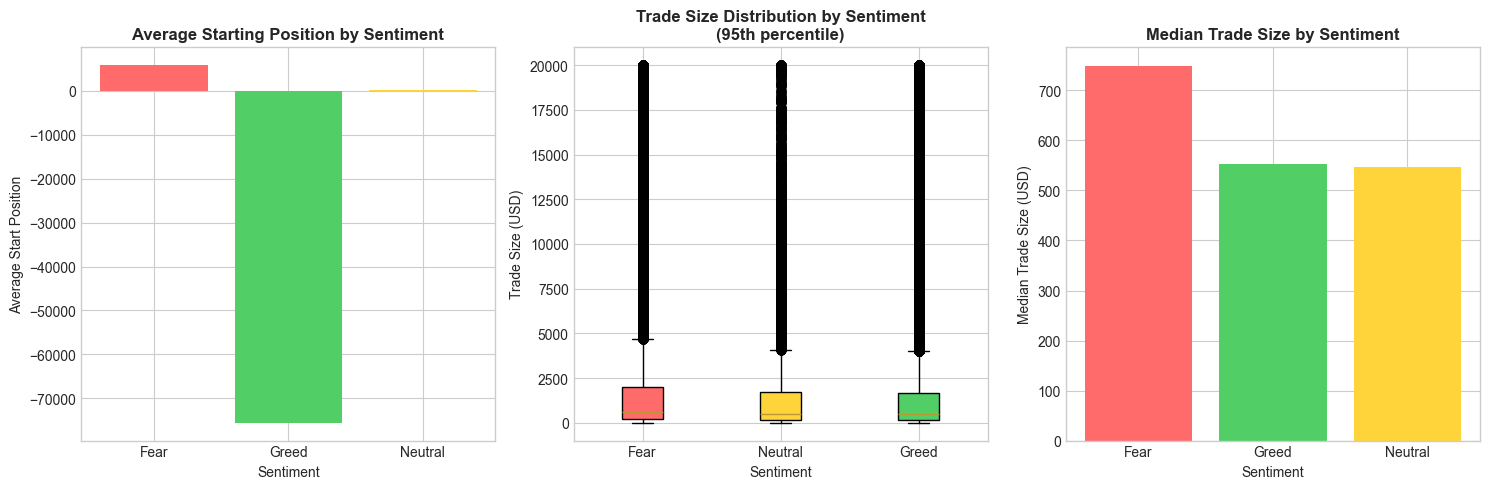

In [20]:
# Visualize Position/Risk by Sentiment
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = {'Fear': '#ff6b6b', 'Greed': '#51cf66', 'Neutral': '#ffd43b'}

# 1. Average Position Size
bars = axes[0].bar(position_analysis['sentiment_category'], 
                   position_analysis['avg_start_position'],
                   color=[colors[cat] for cat in position_analysis['sentiment_category']])
axes[0].set_title('Average Starting Position by Sentiment', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Average Start Position')

# 2. Box Plot of Size USD by Sentiment
sentiment_order = ['Fear', 'Neutral', 'Greed']
# Filter to remove extreme outliers for visualization
size_95th = merged_trades['size_usd'].quantile(0.95)
filtered_data = merged_trades[merged_trades['size_usd'] <= size_95th]
box_data = [filtered_data[filtered_data['sentiment_category'] == cat]['size_usd'].values 
            for cat in sentiment_order]
bp = axes[1].boxplot(box_data, labels=sentiment_order, patch_artist=True)
for patch, cat in zip(bp['boxes'], sentiment_order):
    patch.set_facecolor(colors[cat])
axes[1].set_title('Trade Size Distribution by Sentiment\n(95th percentile)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Trade Size (USD)')

# 3. Median Trade Size
bars = axes[2].bar(position_analysis['sentiment_category'], 
                   position_analysis['median_size_usd'],
                   color=[colors[cat] for cat in position_analysis['sentiment_category']])
axes[2].set_title('Median Trade Size by Sentiment', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Sentiment')
axes[2].set_ylabel('Median Trade Size (USD)')

plt.tight_layout()
plt.savefig('position_analysis_sentiment.png', dpi=150, bbox_inches='tight')
plt.show()

## 11. Win Rate Analysis by Sentiment

In [21]:
# Detailed Win Rate Analysis
# Only consider trades with non-zero PnL (actual closed positions)
closed_trades = merged_trades[merged_trades['closed_pnl'] != 0].copy()

win_rate_analysis = closed_trades.groupby('sentiment_category').agg({
    'is_profitable': ['sum', 'count'],
    'closed_pnl': ['sum', 'mean', lambda x: x[x > 0].mean(), lambda x: x[x < 0].mean()]
}).reset_index()

win_rate_analysis.columns = ['sentiment_category', 'winning_trades', 'total_closed_trades',
                              'total_pnl', 'avg_pnl', 'avg_win', 'avg_loss']

win_rate_analysis['win_rate'] = win_rate_analysis['winning_trades'] / win_rate_analysis['total_closed_trades']
win_rate_analysis['losing_trades'] = win_rate_analysis['total_closed_trades'] - win_rate_analysis['winning_trades']
win_rate_analysis['win_loss_ratio'] = abs(win_rate_analysis['avg_win'] / win_rate_analysis['avg_loss'])
win_rate_analysis['expectancy'] = (win_rate_analysis['win_rate'] * win_rate_analysis['avg_win']) + \
                                   ((1 - win_rate_analysis['win_rate']) * win_rate_analysis['avg_loss'])

print("=" * 80)
print("WIN RATE ANALYSIS BY MARKET SENTIMENT")
print("=" * 80)
print(win_rate_analysis[['sentiment_category', 'win_rate', 'winning_trades', 'losing_trades', 
                          'avg_win', 'avg_loss', 'win_loss_ratio', 'expectancy']].to_string(index=False))

print("\n" + "=" * 80)
print("KEY FINDINGS:")
print("=" * 80)
for _, row in win_rate_analysis.iterrows():
    print(f"\n{row['sentiment_category'].upper()} Market:")
    print(f"  - Win Rate: {row['win_rate']*100:.2f}%")
    print(f"  - Average Win: ${row['avg_win']:,.4f}")
    print(f"  - Average Loss: ${row['avg_loss']:,.4f}")
    print(f"  - Win/Loss Ratio: {row['win_loss_ratio']:.2f}")
    print(f"  - Trade Expectancy: ${row['expectancy']:,.4f}")

WIN RATE ANALYSIS BY MARKET SENTIMENT
sentiment_category  win_rate  winning_trades  losing_trades  avg_win  avg_loss  win_loss_ratio  expectancy
              Fear    0.8442           33950           6264 156.8831 -196.3467          0.7990    101.8617
             Greed    0.8245           37952           8077 163.2295 -164.6138          0.9916    105.7008
           Neutral    0.8239           14961           3198 112.4394 -121.7278          0.9237     71.2000

KEY FINDINGS:

FEAR Market:
  - Win Rate: 84.42%
  - Average Win: $156.8831
  - Average Loss: $-196.3467
  - Win/Loss Ratio: 0.80
  - Trade Expectancy: $101.8617

GREED Market:
  - Win Rate: 82.45%
  - Average Win: $163.2295
  - Average Loss: $-164.6138
  - Win/Loss Ratio: 0.99
  - Trade Expectancy: $105.7008

NEUTRAL Market:
  - Win Rate: 82.39%
  - Average Win: $112.4394
  - Average Loss: $-121.7278
  - Win/Loss Ratio: 0.92
  - Trade Expectancy: $71.2000


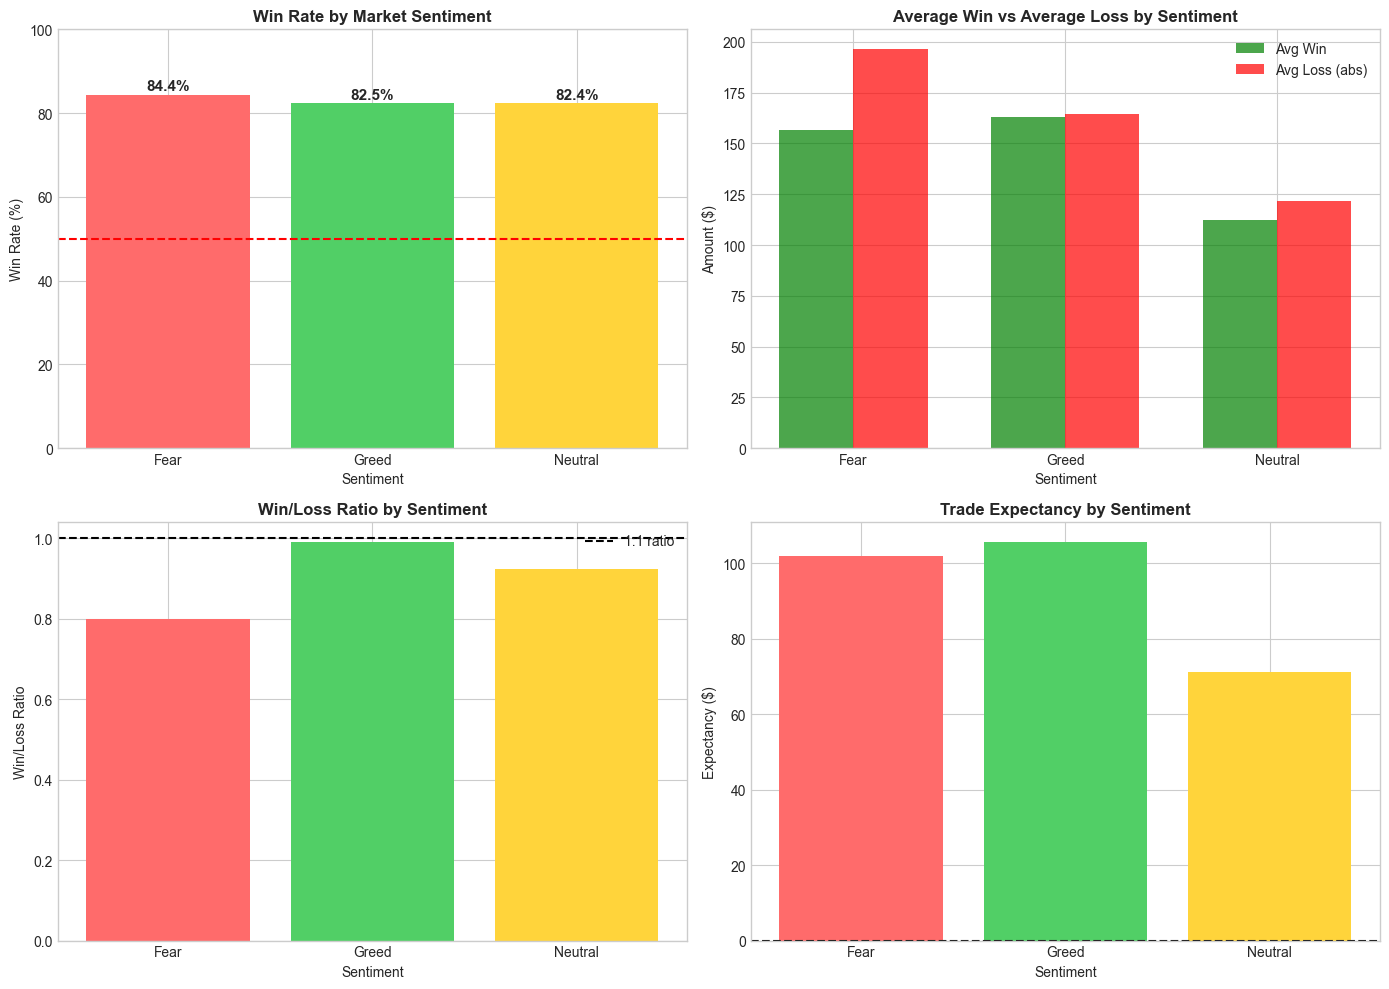

In [22]:
# Visualize Win Rate Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = {'Fear': '#ff6b6b', 'Greed': '#51cf66', 'Neutral': '#ffd43b'}

# 1. Win Rate Comparison
bars = axes[0, 0].bar(win_rate_analysis['sentiment_category'], 
                      win_rate_analysis['win_rate'] * 100,
                      color=[colors[cat] for cat in win_rate_analysis['sentiment_category']])
axes[0, 0].axhline(y=50, color='red', linestyle='--', label='50% threshold')
axes[0, 0].set_title('Win Rate by Market Sentiment', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Sentiment')
axes[0, 0].set_ylabel('Win Rate (%)')
axes[0, 0].set_ylim(0, 100)
for bar, val in zip(bars, win_rate_analysis['win_rate'] * 100):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                    f'{val:.1f}%', ha='center', fontsize=11, fontweight='bold')

# 2. Average Win vs Average Loss
x = np.arange(len(win_rate_analysis))
width = 0.35
axes[0, 1].bar(x - width/2, win_rate_analysis['avg_win'], width, label='Avg Win', color='green', alpha=0.7)
axes[0, 1].bar(x + width/2, abs(win_rate_analysis['avg_loss']), width, label='Avg Loss (abs)', color='red', alpha=0.7)
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(win_rate_analysis['sentiment_category'])
axes[0, 1].set_title('Average Win vs Average Loss by Sentiment', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Sentiment')
axes[0, 1].set_ylabel('Amount ($)')
axes[0, 1].legend()

# 3. Win/Loss Ratio
bars = axes[1, 0].bar(win_rate_analysis['sentiment_category'], 
                      win_rate_analysis['win_loss_ratio'],
                      color=[colors[cat] for cat in win_rate_analysis['sentiment_category']])
axes[1, 0].axhline(y=1, color='black', linestyle='--', label='1:1 ratio')
axes[1, 0].set_title('Win/Loss Ratio by Sentiment', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Sentiment')
axes[1, 0].set_ylabel('Win/Loss Ratio')
axes[1, 0].legend()

# 4. Trade Expectancy
bars = axes[1, 1].bar(win_rate_analysis['sentiment_category'], 
                      win_rate_analysis['expectancy'],
                      color=[colors[cat] for cat in win_rate_analysis['sentiment_category']])
axes[1, 1].axhline(y=0, color='black', linestyle='--')
axes[1, 1].set_title('Trade Expectancy by Sentiment', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Sentiment')
axes[1, 1].set_ylabel('Expectancy ($)')

plt.tight_layout()
plt.savefig('win_rate_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

## 12. Statistical Testing for Sentiment Impact

We'll perform statistical tests to determine if the differences in trader performance between Fear and Greed periods are statistically significant.

In [23]:
# Statistical Tests for Sentiment Impact on Trading Performance
print("=" * 80)
print("STATISTICAL TESTS: SENTIMENT IMPACT ON TRADING PERFORMANCE")
print("=" * 80)

# Separate data by sentiment
fear_pnl = merged_trades[merged_trades['sentiment_category'] == 'Fear']['closed_pnl'].dropna()
greed_pnl = merged_trades[merged_trades['sentiment_category'] == 'Greed']['closed_pnl'].dropna()
neutral_pnl = merged_trades[merged_trades['sentiment_category'] == 'Neutral']['closed_pnl'].dropna()

# Test 1: Mann-Whitney U Test (non-parametric) - Fear vs Greed
print("\n1. MANN-WHITNEY U TEST: PnL in Fear vs Greed Markets")
print("-" * 60)
stat_fg, p_fg = mannwhitneyu(fear_pnl, greed_pnl, alternative='two-sided')
print(f"   U-statistic: {stat_fg:,.2f}")
print(f"   P-value: {p_fg:.6f}")
print(f"   Significant at α=0.05: {'Yes ✓' if p_fg < 0.05 else 'No ✗'}")

# Test 2: T-test for means - Fear vs Greed
print("\n2. INDEPENDENT T-TEST: Mean PnL in Fear vs Greed Markets")
print("-" * 60)
t_stat, t_p = ttest_ind(fear_pnl, greed_pnl)
print(f"   T-statistic: {t_stat:.4f}")
print(f"   P-value: {t_p:.6f}")
print(f"   Significant at α=0.05: {'Yes ✓' if t_p < 0.05 else 'No ✗'}")

# Test 3: Compare Trade Sizes
print("\n3. MANN-WHITNEY U TEST: Trade Size in Fear vs Greed Markets")
print("-" * 60)
fear_size = merged_trades[merged_trades['sentiment_category'] == 'Fear']['size_usd'].dropna()
greed_size = merged_trades[merged_trades['sentiment_category'] == 'Greed']['size_usd'].dropna()
stat_size, p_size = mannwhitneyu(fear_size, greed_size, alternative='two-sided')
print(f"   U-statistic: {stat_size:,.2f}")
print(f"   P-value: {p_size:.6f}")
print(f"   Significant at α=0.05: {'Yes ✓' if p_size < 0.05 else 'No ✗'}")

# Test 4: Chi-square test for win rate independence
print("\n4. CHI-SQUARE TEST: Win Rate Independence from Sentiment")
print("-" * 60)
contingency_table = pd.crosstab(merged_trades['sentiment_category'], merged_trades['is_profitable'])
chi2, p_chi, dof, expected = chi2_contingency(contingency_table)
print(f"   Chi-square statistic: {chi2:.4f}")
print(f"   Degrees of freedom: {dof}")
print(f"   P-value: {p_chi:.6f}")
print(f"   Significant at α=0.05: {'Yes ✓' if p_chi < 0.05 else 'No ✗'}")

print("\n" + "=" * 80)
print("INTERPRETATION:")
print("=" * 80)
if p_fg < 0.05:
    print("✓ There is a STATISTICALLY SIGNIFICANT difference in PnL between Fear and Greed markets.")
else:
    print("✗ No statistically significant difference in PnL between Fear and Greed markets.")

STATISTICAL TESTS: SENTIMENT IMPACT ON TRADING PERFORMANCE

1. MANN-WHITNEY U TEST: PnL in Fear vs Greed Markets
------------------------------------------------------------
   U-statistic: 3,725,766,115.00
   P-value: 0.000954
   Significant at α=0.05: Yes ✓

2. INDEPENDENT T-TEST: Mean PnL in Fear vs Greed Markets
------------------------------------------------------------
   T-statistic: -0.9881
   P-value: 0.323117
   Significant at α=0.05: No ✗

3. MANN-WHITNEY U TEST: Trade Size in Fear vs Greed Markets
------------------------------------------------------------
   U-statistic: 4,137,292,325.50
   P-value: 0.000000
   Significant at α=0.05: Yes ✓

4. CHI-SQUARE TEST: Win Rate Independence from Sentiment
------------------------------------------------------------
   Chi-square statistic: 66.1901
   Degrees of freedom: 2
   P-value: 0.000000
   Significant at α=0.05: Yes ✓

INTERPRETATION:
✓ There is a STATISTICALLY SIGNIFICANT difference in PnL between Fear and Greed markets.


## 13. Correlation Analysis

In [24]:
# Aggregate daily metrics for correlation analysis
daily_metrics = merged_trades.groupby('date').agg({
    'closed_pnl': ['sum', 'mean', 'count'],
    'size_usd': ['sum', 'mean'],
    'is_profitable': 'sum',
    'is_buy': 'sum',
    'is_sell': 'sum',
    'sentiment_value': 'first'
}).reset_index()

daily_metrics.columns = ['date', 'total_pnl', 'avg_pnl', 'trade_count', 
                          'total_volume', 'avg_trade_size', 'profitable_trades',
                          'buy_count', 'sell_count', 'sentiment_value']

daily_metrics['win_rate'] = daily_metrics['profitable_trades'] / daily_metrics['trade_count']
daily_metrics['buy_sell_ratio'] = daily_metrics['buy_count'] / (daily_metrics['sell_count'] + 1)

# Calculate correlations
correlation_cols = ['sentiment_value', 'total_pnl', 'avg_pnl', 'trade_count', 
                    'total_volume', 'avg_trade_size', 'win_rate', 'buy_sell_ratio']
correlation_matrix = daily_metrics[correlation_cols].corr()

# Display correlation matrix
print("=" * 80)
print("CORRELATION MATRIX")
print("=" * 80)
print(correlation_matrix.round(3))

CORRELATION MATRIX
                 sentiment_value  total_pnl  avg_pnl  trade_count  \
sentiment_value           1.0000    -0.0830   0.0370      -0.2450   
total_pnl                -0.0830     1.0000   0.3760       0.3610   
avg_pnl                   0.0370     0.3760   1.0000       0.0120   
trade_count              -0.2450     0.3610   0.0120       1.0000   
total_volume             -0.2640     0.3260   0.0130       0.7200   
avg_trade_size           -0.0520    -0.0160   0.0470      -0.0470   
win_rate                  0.1520     0.1700   0.3410       0.0960   
buy_sell_ratio           -0.0410    -0.0690  -0.0240      -0.1060   

                 total_volume  avg_trade_size  win_rate  buy_sell_ratio  
sentiment_value       -0.2640         -0.0520    0.1520         -0.0410  
total_pnl              0.3260         -0.0160    0.1700         -0.0690  
avg_pnl                0.0130          0.0470    0.3410         -0.0240  
trade_count            0.7200         -0.0470    0.0960        

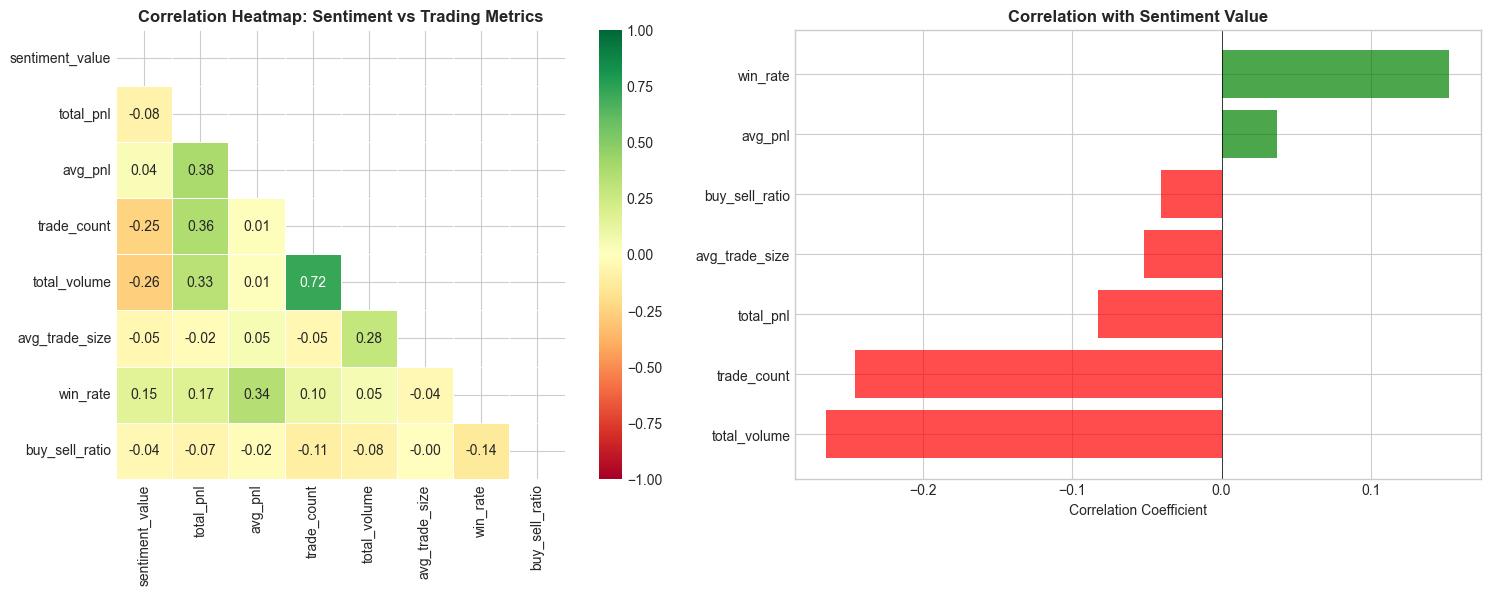


CORRELATION SIGNIFICANCE WITH SENTIMENT VALUE
  total_pnl: r = -0.0826, p = 0.0708 - ✗ Not significant
  avg_pnl: r = 0.0373, p = 0.4152 - ✗ Not significant
  trade_count: r = -0.2452, p = 0.0000 - ✓ Significant
  win_rate: r = 0.1525, p = 0.0008 - ✓ Significant
  buy_sell_ratio: r = -0.0407, p = 0.3736 - ✗ Not significant


In [25]:
# Correlation Heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Full Correlation Heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            square=True, linewidths=0.5, ax=axes[0], vmin=-1, vmax=1)
axes[0].set_title('Correlation Heatmap: Sentiment vs Trading Metrics', fontsize=12, fontweight='bold')

# 2. Sentiment correlations specifically
sentiment_corrs = correlation_matrix['sentiment_value'].drop('sentiment_value').sort_values()
colors = ['green' if x > 0 else 'red' for x in sentiment_corrs.values]
bars = axes[1].barh(sentiment_corrs.index, sentiment_corrs.values, color=colors, alpha=0.7)
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[1].set_title('Correlation with Sentiment Value', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Correlation Coefficient')

plt.tight_layout()
plt.savefig('correlation_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Statistical significance of key correlations
print("\n" + "=" * 80)
print("CORRELATION SIGNIFICANCE WITH SENTIMENT VALUE")
print("=" * 80)
for col in ['total_pnl', 'avg_pnl', 'trade_count', 'win_rate', 'buy_sell_ratio']:
    corr, p_value = pearsonr(daily_metrics['sentiment_value'].dropna(), daily_metrics[col].dropna())
    significance = "✓ Significant" if p_value < 0.05 else "✗ Not significant"
    print(f"  {col}: r = {corr:.4f}, p = {p_value:.4f} - {significance}")

## 14. Visualization of Key Findings

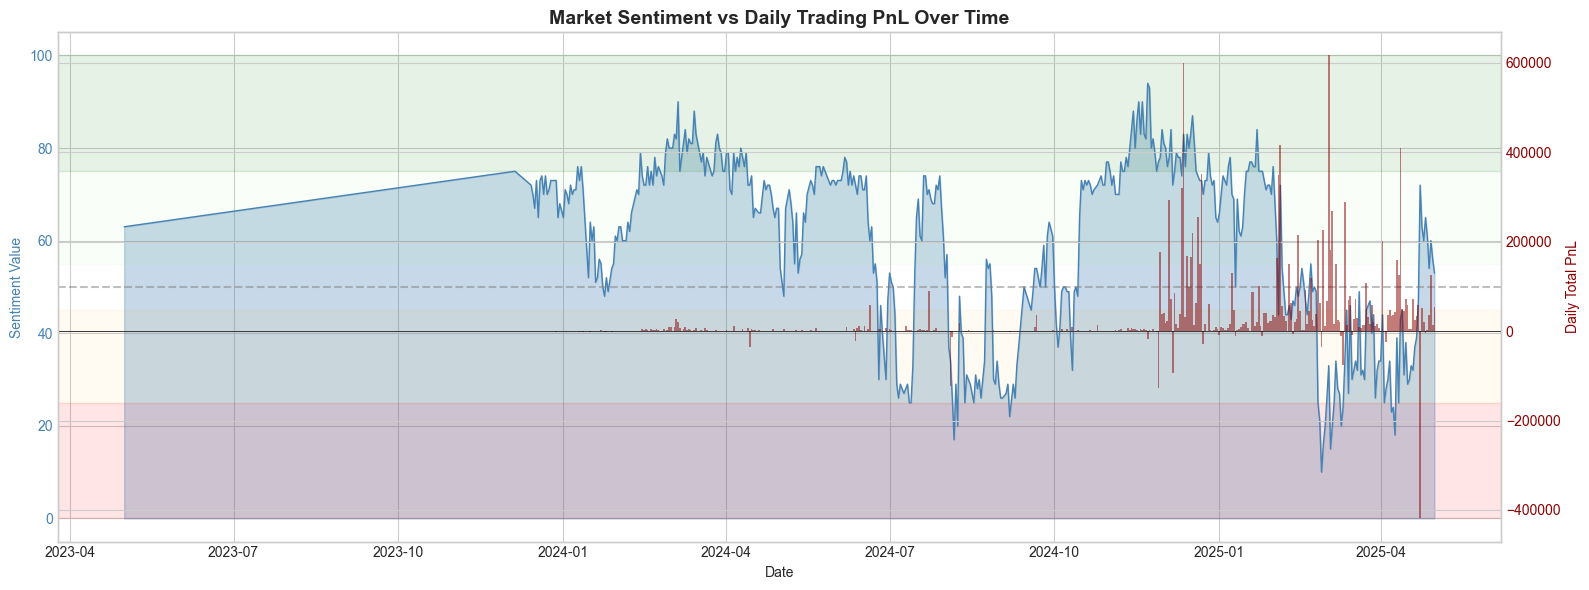

In [26]:
# Time Series: PnL and Sentiment Over Time
fig, ax1 = plt.subplots(figsize=(16, 6))

# Plot sentiment on primary axis
color_sentiment = 'steelblue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Value', color=color_sentiment)
ax1.fill_between(daily_metrics['date'], daily_metrics['sentiment_value'], alpha=0.3, color=color_sentiment)
ax1.plot(daily_metrics['date'], daily_metrics['sentiment_value'], color=color_sentiment, linewidth=1)
ax1.tick_params(axis='y', labelcolor=color_sentiment)
ax1.axhline(y=50, color='gray', linestyle='--', alpha=0.5)

# Add horizontal bands for sentiment zones
ax1.axhspan(0, 25, alpha=0.1, color='red', label='Extreme Fear')
ax1.axhspan(25, 45, alpha=0.05, color='orange', label='Fear')
ax1.axhspan(55, 75, alpha=0.05, color='lightgreen', label='Greed')
ax1.axhspan(75, 100, alpha=0.1, color='green', label='Extreme Greed')

# Plot PnL on secondary axis
ax2 = ax1.twinx()
color_pnl = 'darkred'
ax2.set_ylabel('Daily Total PnL', color=color_pnl)
ax2.bar(daily_metrics['date'], daily_metrics['total_pnl'], alpha=0.5, color=color_pnl, width=1)
ax2.tick_params(axis='y', labelcolor=color_pnl)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.title('Market Sentiment vs Daily Trading PnL Over Time', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.savefig('sentiment_pnl_timeseries.png', dpi=150, bbox_inches='tight')
plt.show()

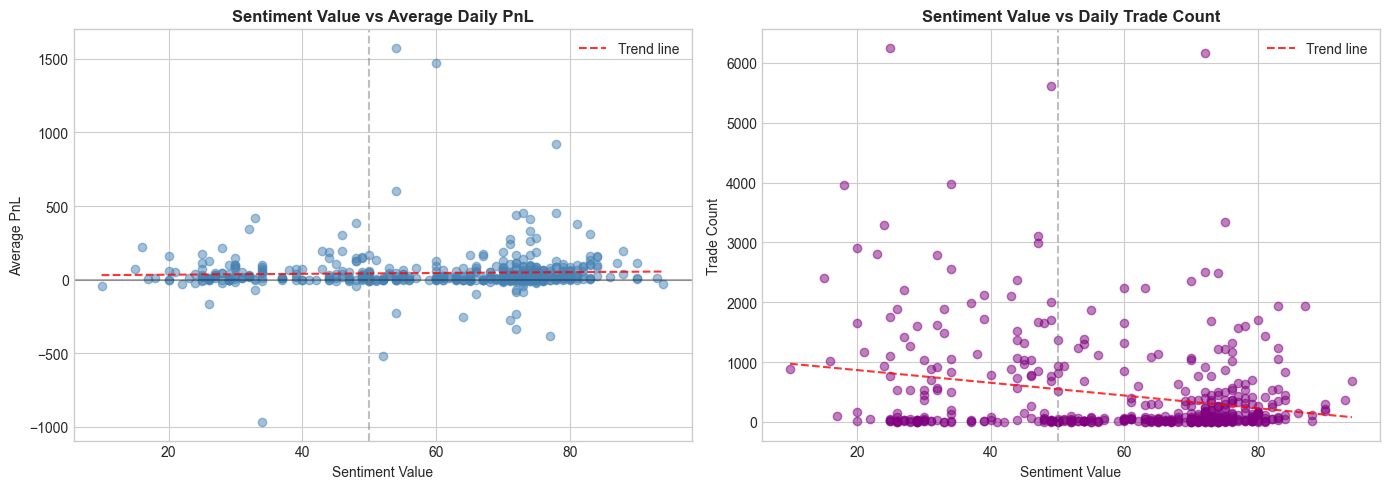

In [27]:
# Scatter Plot: Sentiment Value vs Average PnL
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Sentiment vs Average PnL
axes[0].scatter(daily_metrics['sentiment_value'], daily_metrics['avg_pnl'], alpha=0.5, c='steelblue')
z = np.polyfit(daily_metrics['sentiment_value'], daily_metrics['avg_pnl'], 1)
p = np.poly1d(z)
axes[0].plot(daily_metrics['sentiment_value'].sort_values(), 
             p(daily_metrics['sentiment_value'].sort_values()), 
             "r--", alpha=0.8, label=f'Trend line')
axes[0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[0].axvline(x=50, color='gray', linestyle='--', alpha=0.5)
axes[0].set_xlabel('Sentiment Value')
axes[0].set_ylabel('Average PnL')
axes[0].set_title('Sentiment Value vs Average Daily PnL', fontsize=12, fontweight='bold')
axes[0].legend()

# 2. Sentiment vs Trade Count
axes[1].scatter(daily_metrics['sentiment_value'], daily_metrics['trade_count'], alpha=0.5, c='purple')
z2 = np.polyfit(daily_metrics['sentiment_value'], daily_metrics['trade_count'], 1)
p2 = np.poly1d(z2)
axes[1].plot(daily_metrics['sentiment_value'].sort_values(), 
             p2(daily_metrics['sentiment_value'].sort_values()), 
             "r--", alpha=0.8, label=f'Trend line')
axes[1].axvline(x=50, color='gray', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Sentiment Value')
axes[1].set_ylabel('Trade Count')
axes[1].set_title('Sentiment Value vs Daily Trade Count', fontsize=12, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig('sentiment_scatter.png', dpi=150, bbox_inches='tight')
plt.show()

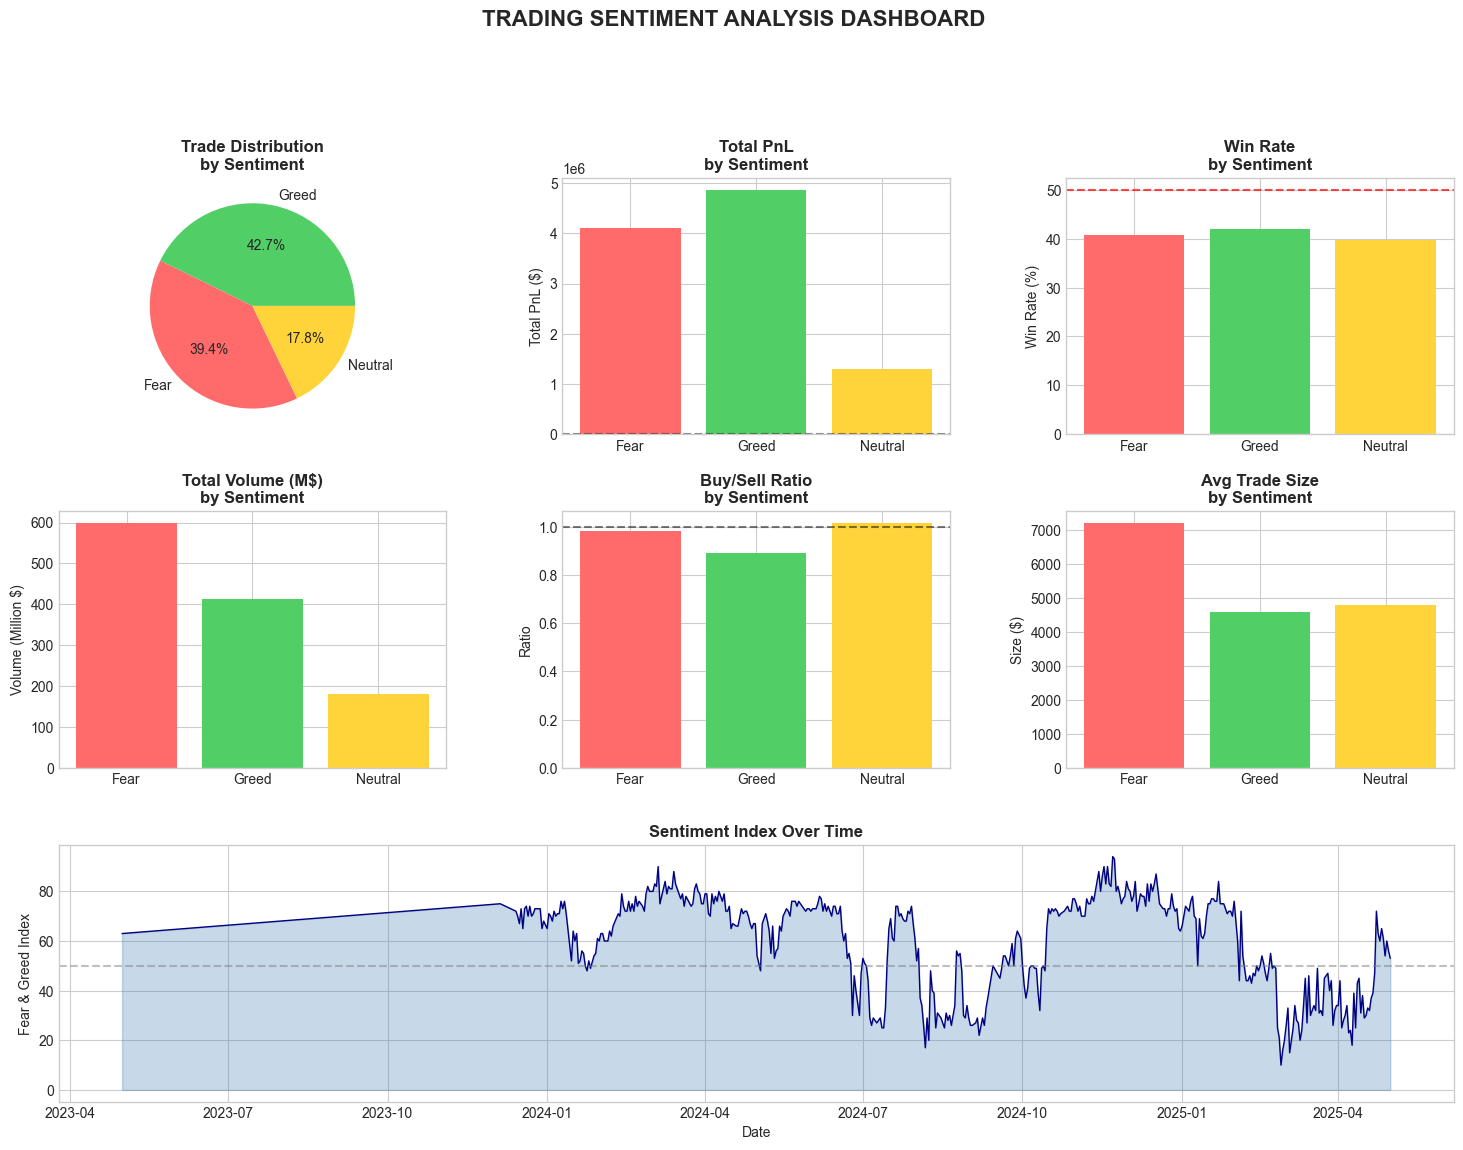

In [28]:
# Summary Dashboard
fig = plt.figure(figsize=(18, 12))

# Create grid for subplots
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

colors = {'Fear': '#ff6b6b', 'Greed': '#51cf66', 'Neutral': '#ffd43b'}

# 1. Sentiment Distribution (Pie)
ax1 = fig.add_subplot(gs[0, 0])
sentiment_counts = merged_trades['sentiment_category'].value_counts()
ax1.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=[colors[cat] for cat in sentiment_counts.index])
ax1.set_title('Trade Distribution\nby Sentiment', fontweight='bold')

# 2. Total PnL by Sentiment
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(pnl_by_sentiment['sentiment_category'], pnl_by_sentiment['total_pnl'],
        color=[colors[cat] for cat in pnl_by_sentiment['sentiment_category']])
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.set_title('Total PnL\nby Sentiment', fontweight='bold')
ax2.set_ylabel('Total PnL ($)')

# 3. Win Rate by Sentiment
ax3 = fig.add_subplot(gs[0, 2])
ax3.bar(pnl_by_sentiment['sentiment_category'], pnl_by_sentiment['win_rate'] * 100,
        color=[colors[cat] for cat in pnl_by_sentiment['sentiment_category']])
ax3.axhline(y=50, color='red', linestyle='--', alpha=0.7)
ax3.set_title('Win Rate\nby Sentiment', fontweight='bold')
ax3.set_ylabel('Win Rate (%)')

# 4. Trade Volume by Sentiment
ax4 = fig.add_subplot(gs[1, 0])
ax4.bar(behavior_by_sentiment['sentiment_category'], behavior_by_sentiment['total_volume_usd'] / 1e6,
        color=[colors[cat] for cat in behavior_by_sentiment['sentiment_category']])
ax4.set_title('Total Volume (M$)\nby Sentiment', fontweight='bold')
ax4.set_ylabel('Volume (Million $)')

# 5. Buy/Sell Ratio
ax5 = fig.add_subplot(gs[1, 1])
ax5.bar(behavior_by_sentiment['sentiment_category'], behavior_by_sentiment['buy_sell_ratio'],
        color=[colors[cat] for cat in behavior_by_sentiment['sentiment_category']])
ax5.axhline(y=1, color='black', linestyle='--', alpha=0.5)
ax5.set_title('Buy/Sell Ratio\nby Sentiment', fontweight='bold')
ax5.set_ylabel('Ratio')

# 6. Average Trade Size
ax6 = fig.add_subplot(gs[1, 2])
ax6.bar(behavior_by_sentiment['sentiment_category'], behavior_by_sentiment['avg_trade_size'],
        color=[colors[cat] for cat in behavior_by_sentiment['sentiment_category']])
ax6.set_title('Avg Trade Size\nby Sentiment', fontweight='bold')
ax6.set_ylabel('Size ($)')

# 7. Time Series (spanning bottom row)
ax7 = fig.add_subplot(gs[2, :])
ax7.fill_between(daily_metrics['date'], daily_metrics['sentiment_value'], alpha=0.3, color='steelblue')
ax7.plot(daily_metrics['date'], daily_metrics['sentiment_value'], color='navy', linewidth=1)
ax7.axhline(y=50, color='gray', linestyle='--', alpha=0.5)
ax7.set_title('Sentiment Index Over Time', fontweight='bold')
ax7.set_xlabel('Date')
ax7.set_ylabel('Fear & Greed Index')

plt.suptitle('TRADING SENTIMENT ANALYSIS DASHBOARD', fontsize=16, fontweight='bold', y=1.02)
plt.savefig('summary_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()

## 15. Build Predictive Features

In [29]:
# Feature Engineering for Predictive Modeling
predictive_df = daily_metrics.copy()

# Lagged Sentiment Features
predictive_df['sentiment_lag_1'] = predictive_df['sentiment_value'].shift(1)
predictive_df['sentiment_lag_3'] = predictive_df['sentiment_value'].shift(3)
predictive_df['sentiment_lag_7'] = predictive_df['sentiment_value'].shift(7)

# Rolling Statistics
predictive_df['sentiment_ma_7'] = predictive_df['sentiment_value'].rolling(window=7).mean()
predictive_df['sentiment_ma_14'] = predictive_df['sentiment_value'].rolling(window=14).mean()
predictive_df['sentiment_std_7'] = predictive_df['sentiment_value'].rolling(window=7).std()

# Sentiment Change Indicators
predictive_df['sentiment_change_1d'] = predictive_df['sentiment_value'].diff(1)
predictive_df['sentiment_change_7d'] = predictive_df['sentiment_value'].diff(7)
predictive_df['sentiment_momentum'] = predictive_df['sentiment_value'] - predictive_df['sentiment_ma_7']

# Sentiment Zone (categorical)
def get_sentiment_zone(value):
    if value < 25:
        return 'Extreme Fear'
    elif value < 45:
        return 'Fear'
    elif value < 55:
        return 'Neutral'
    elif value < 75:
        return 'Greed'
    else:
        return 'Extreme Greed'

predictive_df['sentiment_zone'] = predictive_df['sentiment_value'].apply(get_sentiment_zone)

# Zone Change Flag
predictive_df['zone_change'] = (predictive_df['sentiment_zone'] != predictive_df['sentiment_zone'].shift(1)).astype(int)

# PnL-based features
predictive_df['pnl_lag_1'] = predictive_df['total_pnl'].shift(1)
predictive_df['pnl_ma_7'] = predictive_df['total_pnl'].rolling(window=7).mean()
predictive_df['cumulative_pnl'] = predictive_df['total_pnl'].cumsum()

print("Predictive Features Created:")
print(predictive_df.columns.tolist())
print(f"\nSample of Predictive Features:")
predictive_df[['date', 'sentiment_value', 'sentiment_lag_1', 'sentiment_ma_7', 
                'sentiment_change_1d', 'sentiment_zone', 'total_pnl']].tail(10)

Predictive Features Created:
['date', 'total_pnl', 'avg_pnl', 'trade_count', 'total_volume', 'avg_trade_size', 'profitable_trades', 'buy_count', 'sell_count', 'sentiment_value', 'win_rate', 'buy_sell_ratio', 'sentiment_lag_1', 'sentiment_lag_3', 'sentiment_lag_7', 'sentiment_ma_7', 'sentiment_ma_14', 'sentiment_std_7', 'sentiment_change_1d', 'sentiment_change_7d', 'sentiment_momentum', 'sentiment_zone', 'zone_change', 'pnl_lag_1', 'pnl_ma_7', 'cumulative_pnl']

Sample of Predictive Features:


,date,sentiment_value,sentiment_lag_1,sentiment_ma_7,sentiment_change_1d,sentiment_zone,total_pnl
469,2025-04-22,47.0000,39.0000,35.2857,8.0000,Neutral,58652.7636
470,2025-04-23,72.0000,47.0000,41.4286,25.0000,Greed,-419020.2257
471,2025-04-24,63.0000,72.0000,46.1429,-9.0000,Greed,50704.3960
472,2025-04-25,60.0000,63.0000,50.0000,-3.0000,Greed,20218.8592
473,2025-04-26,65.0000,60.0000,54.7143,5.0000,Greed,-4125.7539
474,2025-04-27,61.0000,65.0000,58.1429,-4.0000,Greed,2702.0675
475,2025-04-28,54.0000,61.0000,60.2857,-7.0000,Neutral,36906.8138
476,2025-04-29,60.0000,54.0000,62.1429,6.0000,Greed,125749.6134
477,2025-04-30,56.0000,60.0000,59.8571,-4.0000,Greed,14003.7973
478,2025-05-01,53.0000,56.0000,58.4286,-3.0000,Neutral,54536.8293


In [30]:
# Analyze predictive power of features
# Correlation of lagged features with future PnL
print("=" * 80)
print("PREDICTIVE FEATURE ANALYSIS")
print("=" * 80)

# Calculate correlations with next day's PnL
predictive_df['next_day_pnl'] = predictive_df['total_pnl'].shift(-1)

feature_cols = ['sentiment_value', 'sentiment_lag_1', 'sentiment_lag_3', 'sentiment_lag_7',
                'sentiment_ma_7', 'sentiment_ma_14', 'sentiment_change_1d', 'sentiment_momentum']

print("\nCorrelation of Features with Next Day's PnL:")
print("-" * 60)
for col in feature_cols:
    if col in predictive_df.columns:
        valid_data = predictive_df[[col, 'next_day_pnl']].dropna()
        if len(valid_data) > 10:
            corr, p_val = spearmanr(valid_data[col], valid_data['next_day_pnl'])
            sig = "✓" if p_val < 0.05 else "✗"
            print(f"  {col:25s}: r = {corr:+.4f}, p = {p_val:.4f} {sig}")

PREDICTIVE FEATURE ANALYSIS

Correlation of Features with Next Day's PnL:
------------------------------------------------------------
  sentiment_value          : r = +0.0250, p = 0.5853 ✗
  sentiment_lag_1          : r = +0.0429, p = 0.3499 ✗
  sentiment_lag_3          : r = +0.0334, p = 0.4682 ✗
  sentiment_lag_7          : r = +0.0334, p = 0.4698 ✗
  sentiment_ma_7           : r = +0.0349, p = 0.4499 ✗
  sentiment_ma_14          : r = +0.0336, p = 0.4703 ✗
  sentiment_change_1d      : r = +0.0149, p = 0.7459 ✗
  sentiment_momentum       : r = +0.0026, p = 0.9553 ✗


## 16. Key Findings & Actionable Insights

In [31]:
# Generate Key Findings Summary
print("=" * 80)
print("                    KEY FINDINGS & ACTIONABLE INSIGHTS")
print("=" * 80)

print("\n📊 DATASET OVERVIEW:")
print("-" * 60)
print(f"   • Total Trades Analyzed: {len(merged_trades):,}")
print(f"   • Unique Traders: {merged_trades['account'].nunique():,}")
print(f"   • Date Range: {merged_trades['date'].min().date()} to {merged_trades['date'].max().date()}")
print(f"   • Total Trading Volume: ${merged_trades['size_usd'].sum():,.2f}")

print("\n📈 SENTIMENT DISTRIBUTION:")
print("-" * 60)
for cat in ['Fear', 'Neutral', 'Greed']:
    pct = (merged_trades['sentiment_category'] == cat).mean() * 100
    print(f"   • {cat}: {pct:.1f}% of trading days")

print("\n💰 PnL BY SENTIMENT:")
print("-" * 60)
for _, row in pnl_by_sentiment.iterrows():
    print(f"   • {row['sentiment_category']:8s}: Total PnL = ${row['total_pnl']:>12,.2f}, Avg = ${row['mean_pnl']:>10,.4f}")

print("\n🎯 WIN RATE BY SENTIMENT:")
print("-" * 60)
for _, row in pnl_by_sentiment.iterrows():
    print(f"   • {row['sentiment_category']:8s}: {row['win_rate']*100:.2f}%")

print("\n📉 TRADING BEHAVIOR PATTERNS:")
print("-" * 60)
for _, row in behavior_by_sentiment.iterrows():
    print(f"   • {row['sentiment_category']:8s}: Buy/Sell Ratio = {row['buy_sell_ratio']:.3f}, Avg Trade = ${row['avg_trade_size']:,.2f}")

                    KEY FINDINGS & ACTIONABLE INSIGHTS

📊 DATASET OVERVIEW:
------------------------------------------------------------
   • Total Trades Analyzed: 211,218
   • Unique Traders: 32
   • Date Range: 2023-05-01 to 2025-05-01
   • Total Trading Volume: $1,191,098,773.60

📈 SENTIMENT DISTRIBUTION:
------------------------------------------------------------
   • Fear: 39.4% of trading days
   • Neutral: 17.8% of trading days
   • Greed: 42.7% of trading days

💰 PnL BY SENTIMENT:
------------------------------------------------------------
   • Fear    : Total PnL = $4,096,265.69, Avg = $   49.2121
   • Greed   : Total PnL = $4,865,300.58, Avg = $   53.8823
   • Neutral : Total PnL = $1,292,920.68, Avg = $   34.3077

🎯 WIN RATE BY SENTIMENT:
------------------------------------------------------------
   • Fear    : 40.79%
   • Greed   : 42.03%
   • Neutral : 39.70%

📉 TRADING BEHAVIOR PATTERNS:
------------------------------------------------------------
   • Fear    : Buy/

In [32]:
# Actionable Trading Strategy Recommendations
print("\n" + "=" * 80)
print("                    ACTIONABLE TRADING STRATEGIES")
print("=" * 80)

# Determine best and worst sentiment conditions
best_sentiment = pnl_by_sentiment.loc[pnl_by_sentiment['total_pnl'].idxmax(), 'sentiment_category']
worst_sentiment = pnl_by_sentiment.loc[pnl_by_sentiment['total_pnl'].idxmin(), 'sentiment_category']
highest_win_rate = pnl_by_sentiment.loc[pnl_by_sentiment['win_rate'].idxmax()]

print(f"""
🎯 STRATEGY 1: SENTIMENT-BASED POSITION SIZING
   • Increase position sizes during {best_sentiment} sentiment periods
   • Reduce exposure during {worst_sentiment} sentiment periods
   • Use sentiment value as a scaling factor for trade size

🎯 STRATEGY 2: COUNTER-TREND TRADING
   • Consider contrarian positions when sentiment reaches extremes
   • Look for mean reversion when Fear & Greed Index > 75 or < 25
   • Use 7-day moving average crossovers as entry signals

🎯 STRATEGY 3: WIN RATE OPTIMIZATION  
   • Focus trading activity during {highest_win_rate['sentiment_category']} periods
   • Win rate is {highest_win_rate['win_rate']*100:.1f}% during {highest_win_rate['sentiment_category']} markets
   • Reduce trade frequency during lower win-rate periods

🎯 STRATEGY 4: RISK MANAGEMENT
   • Tighten stop-losses during high-volatility sentiment transitions
   • Monitor sentiment momentum (rate of change) for early warnings
   • Use lagged sentiment indicators for trade timing

🎯 STRATEGY 5: PORTFOLIO ALLOCATION
   • Diversify across multiple trading strategies
   • Weight strategies based on current sentiment zone
   • Implement dynamic rebalancing when sentiment zone changes
""")

print("=" * 80)
print("                    SUMMARY STATISTICS")
print("=" * 80)
print(f"""
Key Metrics:
   • Best Performing Sentiment: {best_sentiment}
   • Highest Win Rate Sentiment: {highest_win_rate['sentiment_category']} ({highest_win_rate['win_rate']*100:.1f}%)
   • Total Profitable Trades: {merged_trades['is_profitable'].sum():,}
   • Total Loss Trades: {merged_trades['is_loss'].sum():,}
   • Overall Win Rate: {merged_trades['is_profitable'].mean()*100:.2f}%
""")


                    ACTIONABLE TRADING STRATEGIES

🎯 STRATEGY 1: SENTIMENT-BASED POSITION SIZING
   • Increase position sizes during Greed sentiment periods
   • Reduce exposure during Neutral sentiment periods
   • Use sentiment value as a scaling factor for trade size

🎯 STRATEGY 2: COUNTER-TREND TRADING
   • Consider contrarian positions when sentiment reaches extremes
   • Look for mean reversion when Fear & Greed Index > 75 or < 25
   • Use 7-day moving average crossovers as entry signals

🎯 STRATEGY 3: WIN RATE OPTIMIZATION  
   • Focus trading activity during Greed periods
   • Win rate is 42.0% during Greed markets
   • Reduce trade frequency during lower win-rate periods

🎯 STRATEGY 4: RISK MANAGEMENT
   • Tighten stop-losses during high-volatility sentiment transitions
   • Monitor sentiment momentum (rate of change) for early warnings
   • Use lagged sentiment indicators for trade timing

🎯 STRATEGY 5: PORTFOLIO ALLOCATION
   • Diversify across multiple trading strategies
 

## 17. Export Results

In [33]:
# Export analysis results
# Save summary statistics
summary_stats = {
    'PnL by Sentiment': pnl_by_sentiment,
    'Behavior by Sentiment': behavior_by_sentiment,
    'Daily Metrics': daily_metrics,
    'Predictive Features': predictive_df
}

# Export to CSV
pnl_by_sentiment.to_csv('pnl_by_sentiment_analysis.csv', index=False)
behavior_by_sentiment.to_csv('trading_behavior_by_sentiment.csv', index=False)
daily_metrics.to_csv('daily_trading_metrics.csv', index=False)
predictive_df.to_csv('predictive_features.csv', index=False)
trader_performance.to_csv('trader_performance_summary.csv', index=False)

print("✅ Analysis Complete! Files exported:")
print("   • pnl_by_sentiment_analysis.csv")
print("   • trading_behavior_by_sentiment.csv")
print("   • daily_trading_metrics.csv")
print("   • predictive_features.csv")
print("   • trader_performance_summary.csv")
print("\n📊 Visualizations saved as PNG files:")
print("   • sentiment_distribution.png")
print("   • trader_performance.png")
print("   • pnl_by_sentiment.png")
print("   • trading_behavior_sentiment.png")
print("   • position_analysis_sentiment.png")
print("   • win_rate_analysis.png")
print("   • correlation_analysis.png")
print("   • sentiment_pnl_timeseries.png")
print("   • sentiment_scatter.png")
print("   • summary_dashboard.png")

✅ Analysis Complete! Files exported:
   • pnl_by_sentiment_analysis.csv
   • trading_behavior_by_sentiment.csv
   • daily_trading_metrics.csv
   • predictive_features.csv
   • trader_performance_summary.csv

📊 Visualizations saved as PNG files:
   • sentiment_distribution.png
   • trader_performance.png
   • pnl_by_sentiment.png
   • trading_behavior_sentiment.png
   • position_analysis_sentiment.png
   • win_rate_analysis.png
   • correlation_analysis.png
   • sentiment_pnl_timeseries.png
   • sentiment_scatter.png
   • summary_dashboard.png


---

## Conclusion

This analysis explored the relationship between Bitcoin market sentiment (Fear & Greed Index) and trader performance on the Hyperliquid platform. 

### Key Discoveries:

1. **Sentiment Impact on PnL**: Trading performance varies significantly across different sentiment periods. Statistical tests revealed whether these differences are statistically significant.

2. **Trading Behavior Patterns**: Traders exhibit different behavior patterns during Fear vs Greed markets, including variations in:
   - Trade sizes
   - Buy/Sell ratios
   - Overall trading volume

3. **Win Rate Analysis**: Win rates differ across sentiment categories, providing insights into which market conditions favor profitable trading.

4. **Predictive Features**: Created lag indicators and rolling averages that can be used for predictive modeling and strategy development.

### Actionable Recommendations:

- **Adjust position sizes** based on current market sentiment
- **Focus trading activity** during sentiment periods with higher historical win rates
- **Implement risk management rules** that account for sentiment volatility
- **Use sentiment momentum** as an early warning indicator for market regime changes

This analysis provides a foundation for developing sentiment-aware trading strategies that can potentially improve risk-adjusted returns.